#### UV VIS CORE HEAD vs. 8 CHL

In [1]:
library(ggplot2)        # plotting & data
library(dplyr)          # data manipulation
library(tidyr)          # data re-shaping
library(magrittr)       # pipe operator
library(gridExtra)      # provides side-by-side plotting
library(dplyr)          # dplyr for pipe operations
library(moments)        # bonett.test for normality
library(ggQC)           # to create xMR and iMR charts
library(repr)           # change plot size
library(nortest)        # anderson darling test
library(climtrends)     # FindOutliersTietjenMooreTest


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Change plot size to 12 x 6
options(repr.plot.width=25, repr.plot.height=10)

In [3]:
df <- read.csv("96CRv8CHL_DYE.csv")

df <- df %>%
    mutate(PLATE = rep(paste0("plate",seq(3)), times = 3, each = 8))

head(df)

,X1,X2,X3,X4,X5,X6,X7,X8,METHOD,PLATE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0.375,0.369,0.369,0.354,0.360,0.366,0.366,0.366,8CHL,plate1
2,0.368,0.363,0.367,0.368,0.365,0.361,0.349,0.365,8CHL,plate1
3,0.370,0.344,0.354,0.346,0.344,0.349,0.350,0.336,8CHL,plate1
4,0.367,0.379,0.373,0.353,0.360,0.361,0.356,0.354,8CHL,plate1
5,0.372,0.372,0.370,0.371,0.366,0.369,0.366,0.358,8CHL,plate1
6,0.368,0.369,0.365,0.366,0.365,0.364,0.362,0.368,8CHL,plate1


In [4]:
method_ls <- unique(df$METHOD)
ftest_pair_ls <- list(c(1,2), c(2,3), c(1,3))

In [5]:
method_ls

[1] "8CHL" "MNL"  "96CR"

In [5]:
df %>% filter(METHOD == "8CHL") %>% select_if(grepl("X", names(.)))

X1,X2,X3,X4,X5,X6,X7,X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.375,0.369,0.369,0.354,0.360,0.366,0.366,0.366
0.368,0.363,0.367,0.368,0.365,0.361,0.349,0.365
0.370,0.344,0.354,0.346,0.344,0.349,0.350,0.336
0.367,0.379,0.373,0.353,0.360,0.361,0.356,0.354
0.372,0.372,0.370,0.371,0.366,0.369,0.366,0.358
0.368,0.369,0.365,0.366,0.365,0.364,0.362,0.368
0.372,0.340,0.381,0.361,0.468,0.371,0.360,0.372
0.373,0.366,0.370,0.362,0.360,0.356,0.356,0.370
0.336,0.343,0.340,0.345,0.351,0.344,0.348,0.328


In [43]:
var.test(df.t[[1]], df.t[[2]])


	F test to compare two variances

data:  df.t[[1]] and df.t[[2]]
F = 3.9102, num df = 191, denom df = 191, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.942016 5.196908
sample estimates:
ratio of variances 
          3.910165 


In [42]:
df_stats

,PLATE_PAIR,METHOD,F_TEST,GT_A_FT,WILCOXON_TEST,GT_A_WX,T_TEST,GT_A_TT
,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>
1,1-2,8CHL-MNL,0.00e+00,FALSE,7.37e-45,FALSE,4.77e-42,FALSE
2,2-3,MNL-96CR,3.48e-06,FALSE,1.30e-42,FALSE,2.52e-43,FALSE
3,1-3,8CHL-96CR,2.85e-06,FALSE,1.21e-02,FALSE,3.82e-03,FALSE


In [41]:
# f-test, wilcoxon test, t-test
df_stats <- data.frame() #setNames(data.frame(matrix(ncol = 3, nrow = 0)), c("F_TEST", "WILCOXON_TEST", "T_TEST"))
df.t <- list()

for (i in seq(3)) {
    df.t[[i]] <- df %>% filter(METHOD == method_ls[i] ) %>%
        select_if(grepl("X", names(.)))
    df.t[[i]] <- c(t(df.t[[i]])) 
    }

for (i in seq(3)) {
    idx = ftest_pair_ls[i]
    i1 = idx[[1]][1]
    i2 = idx[[1]][2]
    df_stats[i, "PLATE_PAIR"] = paste0(i1, "-", i2)
    df_stats[i, "METHOD"] = paste0(method_ls[i1], "-", method_ls[i2])
    print(paste("F-TEST", i1, i2))
    print(paste(method_ls[i1], "vs", method_ls[i2]))
    stat <- var.test(df.t[[i1]], df.t[[i2]])
    df_stats[i, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_FT"] = stat$p.value > 0.05
    print(stat)
    print(paste("WILCOXON TEST", i1, i2))
    stat <- wilcox.test(x = df.t[[i1]],
                      y = df.t[[i2]],
           alternative = "two.sided",
           paired = FALSE, var.equal = T,
           conf.level = 0.95) 
    df_stats[i, "WILCOXON_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_WX"] = stat$p.value > 0.05
    print(stat)
    stat <- t.test(x = df.t[[i1]],
                 y = df.t[[i2]],
          alternative = "two.sided",
          paired = FALSE, var.equal = T,
          conf.level = 0.95) 
    df_stats[i, "T_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_TT"] = stat$p.value > 0.05
    print(stat)
    }

write.csv(df_stats, "uv-vis_stats.csv", row.names = FALSE)

[1] "F-TEST 1 2"
[1] "8CHL vs MNL"

	F test to compare two variances

data:  df.t[[i1]] and df.t[[i2]]
F = 3.9102, num df = 191, denom df = 191, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.942016 5.196908
sample estimates:
ratio of variances 
          3.910165 

[1] "WILCOXON TEST 1 2"

	Wilcoxon rank sum test with continuity correction

data:  df.t[[i1]] and df.t[[i2]]
W = 33712, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  df.t[[i1]] and df.t[[i2]]
t = 15.419, df = 382, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01907191 0.02464684
sample estimates:
mean of x mean of y 
0.3562812 0.3344219 

[1] "F-TEST 2 3"
[1] "MNL vs 96CR"

	F test to compare two variances

data:  df.t[[i1]] and df.t[[i2]]
F = 0.50725, num df = 191, denom df = 191, p-value = 3.478e-06
alternative hypo

In [19]:
df_stats

,METHOD,SHAPIRO_TEST,AD_TEST,BONETT_TEST,GEARY
,<chr>,<chr>,<chr>,<chr>,<chr>
1,8CHL,9.21e-17,7.22e-13,1.23e-26,6.50e-01
2,MNL,2.71e-05,1.14e-05,2.48e-06,7.29e-01
3,96CR,3.28e-14,1.44e-18,1.40e-21,6.65e-01


In [18]:
print("Shapiro test, AD test, BONETT, geary")
df_stats <- data.frame()#setNames(data.frame(matrix(ncol = 4, nrow = 0)), c("SHAPIRO_TEST", "AD_TEST", "BONETT_TEST", "GEARY"))
for (i in seq(3)) {
    dtmp <- df %>% 
                filter(METHOD == method_ls[i]) %>%
                select_if(grepl("X", names(.))) 
    dtmp <- c(t(dtmp)) 
    
    df_stats[i, "METHOD"] = method_ls[i]
    print("SHAPIRO")
    stat <- shapiro.test(dtmp)
    df_stats[i, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("AD-TEST")
    stat <- ad.test(dtmp)
    df_stats[i, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("BONETT-TEST")
    stat <- bonett.test(dtmp)
    df_stats[i, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    print(stat)
    print(paste0(rep("-", 25),collapse=""))
    print("geary result:")
    stat <- geary(dtmp)
    df_stats[i, "GEARY"] = formatC(stat, format = "e", digits = 2)
    print(stat)
}
write.csv(df_stats, "uv-vis_stats2.csv", row.names = FALSE)

[1] "Shapiro test, AD test, BONETT, geary"
[1] "SHAPIRO"

	Shapiro-Wilk normality test

data:  dtmp
W = 0.74956, p-value < 2.2e-16

[1] "-------------------------"
[1] "AD-TEST"

	Anderson-Darling normality test

data:  dtmp
A = 5.1914, p-value = 7.221e-13

[1] "-------------------------"
[1] "BONETT-TEST"

	Bonett-Seier test for Geary kurtosis

data:  dtmp
tau = 0.011373, z = 10.682794, p-value < 2.2e-16
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[1] "geary result:"
[1] 0.6504891
[1] "SHAPIRO"

	Shapiro-Wilk normality test

data:  dtmp
W = 0.95971, p-value = 2.712e-05

[1] "-------------------------"
[1] "AD-TEST"

	Anderson-Darling normality test

data:  dtmp
A = 2.2277, p-value = 1.14e-05

[1] "-------------------------"
[1] "BONETT-TEST"

	Bonett-Seier test for Geary kurtosis

data:  dtmp
tau = 0.0064476, z = 4.7100975, p-value = 2.476e-06
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] "-------------------------"
[

In [125]:
head(df)

,X1,X2,X3,X4,X5,X6,X7,X8,METHOD,PLATE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0.375,0.369,0.369,0.354,0.360,0.366,0.366,0.366,8CHL,plate1
2,0.368,0.363,0.367,0.368,0.365,0.361,0.349,0.365,8CHL,plate1
3,0.370,0.344,0.354,0.346,0.344,0.349,0.350,0.336,8CHL,plate1
4,0.367,0.379,0.373,0.353,0.360,0.361,0.356,0.354,8CHL,plate1
5,0.372,0.372,0.370,0.371,0.366,0.369,0.366,0.358,8CHL,plate1
6,0.368,0.369,0.365,0.366,0.365,0.364,0.362,0.368,8CHL,plate1


In [147]:
# simple stats ALL DATA
df_stats <- data.frame()
i = 1

for (m in method_ls) {
        
        dtmp <- df %>% 
                    filter(METHOD == m) %>%
                    select_if(grepl("X", names(.))) 
        dtmp <- c(t(dtmp)) 
        df_stats[i, "METHOD"] = m
        df_stats[i, "MEAN."] = formatC(mean(dtmp), format = "e", digits = 2)
        df_stats[i, "MIN."] = formatC(min(dtmp), format = "e", digits = 2)
        df_stats[i, "MAX."] = formatC(max(dtmp), format = "e", digits = 2)
        df_stats[i, "SD."] = formatC(sd(dtmp), format = "e", digits = 2)
        #pctdiff = abs( mean(dtmp) - mean(dtmp)) / (mean( mean(dtmp), mean(dtmp))/2)
        #df_stats[i, paste0("PCT.DIFF",m)] = paste0(round(pctdiff*100,2), "%")
        df_stats[i, "CV."] = formatC(sd(dtmp)/mean(dtmp), format = "e", digits = 2)
        i = i + 1
}
#df_stats
write.csv(df_stats, paste0("96v8_uvdye_stats_alldata.csv"), row.names = FALSE)

In [150]:
# pct diff  ALL DATA
for (p in ftest_pair_ls) {
    p1 = method_ls[p[1]]
    p2 = method_ls[p[2]]
    print(paste(p1, "-", p2))
    m1 = as.numeric(df_stats['MEAN.'][df_stats['METHOD'] == p1])
    m2 = as.numeric(df_stats['MEAN.'][df_stats['METHOD'] == p2])
    print((abs(m1 - m2) / mean(m1, m2)/2)*100)
    }

[1] "8CHL - MNL"
[1] 3.089888
[1] "MNL - 96CR"
[1] 2.694611
[1] "8CHL - 96CR"
[1] 0.5617978


In [151]:
# simple stats IQR Criterion
df_stats <- data.frame()
i = 1

for (m in method_ls) {
        
        dtmp <- dff %>% 
                filter(METHOD == m) %>%
                select(value) %>%
                pull()
        df_stats[i, "METHOD"] = m
        df_stats[i, "MEAN."] = formatC(mean(dtmp), format = "e", digits = 2)
        df_stats[i, "MIN."] = formatC(min(dtmp), format = "e", digits = 2)
        df_stats[i, "MAX."] = formatC(max(dtmp), format = "e", digits = 2)
        df_stats[i, "SD."] = formatC(sd(dtmp), format = "e", digits = 2)
        #pctdiff = abs( mean(dtmp) - mean(dtmp)) / (mean( mean(dtmp), mean(dtmp))/2)
        #df_stats[i, paste0("PCT.DIFF",m)] = paste0(round(pctdiff*100,2), "%")
        df_stats[i, "CV."] = formatC(sd(dtmp)/mean(dtmp), format = "e", digits = 2)
        i = i + 1
}
#df_stats
write.csv(df_stats, paste0("96v8_uvdye_stats_iqr.csv"), row.names = FALSE)

In [152]:
# pct diff IQR
for (p in ftest_pair_ls) {
    p1 = method_ls[p[1]]
    p2 = method_ls[p[2]]
    print(paste(p1, "-", p2))
    m1 = as.numeric(df_stats['MEAN.'][df_stats['METHOD'] == p1])
    m2 = as.numeric(df_stats['MEAN.'][df_stats['METHOD'] == p2])
    print((abs(m1 - m2) / mean(m1, m2)/2)*100)
    }

[1] "8CHL - MNL"
[1] 2.676056
[1] "MNL - 96CR"
[1] 2.529762
[1] "8CHL - 96CR"
[1] 0.2816901


In [153]:
# simple stats hempel filter
df_stats <- data.frame()
i = 1

for (m in method_ls) {
        
        dtmp <- dff_hf %>% 
                filter(METHOD == m) %>%
                select(value) %>%
                pull()
        df_stats[i, "METHOD"] = m
        df_stats[i, "MEAN."] = formatC(mean(dtmp), format = "e", digits = 2)
        df_stats[i, "MIN."] = formatC(min(dtmp), format = "e", digits = 2)
        df_stats[i, "MAX."] = formatC(max(dtmp), format = "e", digits = 2)
        df_stats[i, "SD."] = formatC(sd(dtmp), format = "e", digits = 2)
        df_stats[i, "CV."] = formatC(sd(dtmp)/mean(dtmp), format = "e", digits = 2)
        i = i + 1
}
#df_stats
write.csv(df_stats, paste0("96v8_uvdye_stats_hempelf.csv"), row.names = FALSE)

In [154]:
# pct diff Hempel 
for (p in ftest_pair_ls) {
    p1 = method_ls[p[1]]
    p2 = method_ls[p[2]]
    print(paste(p1, "-", p2))
    m1 = as.numeric(df_stats['MEAN.'][df_stats['METHOD'] == p1])
    m2 = as.numeric(df_stats['MEAN.'][df_stats['METHOD'] == p2])
    print((abs(m1 - m2) / mean(m1, m2)/2)*100)
    }

[1] "8CHL - MNL"
[1] 2.808989
[1] "MNL - 96CR"
[1] 2.678571
[1] "8CHL - 96CR"
[1] 0.2808989


### qq plot and histogram

In [8]:
dfl <- reshape2::melt(df, id.vars = c("METHOD", "PLATE"), variable.name = "COL")
head(dfl)

,METHOD,PLATE,COL,value
,<chr>,<chr>,<fct>,<dbl>
1,8CHL,plate1,X1,0.375
2,8CHL,plate1,X1,0.368
3,8CHL,plate1,X1,0.370
4,8CHL,plate1,X1,0.367
5,8CHL,plate1,X1,0.372
6,8CHL,plate1,X1,0.368


In [49]:
dfl %>% filter(METHOD == "8CHL") %>% select(value) %>% pull

[1] 0.375 0.368 0.370 0.367 0.372 0.368 0.372 0.373 0.336 0.330 0.331 0.346
 [13] 0.344 0.343 0.339 0.346 0.326 0.324 0.330 0.333 0.328 0.336 0.334 0.340
 [25] 0.369 0.363 0.344 0.379 0.372 0.369 0.340 0.366 0.343 0.348 0.341 0.367
 [37] 0.359 0.360 0.348 0.362 0.328 0.344 0.337 0.357 0.358 0.343 0.349 0.368
 [49] 0.369 0.367 0.354 0.373 0.370 0.365 0.381 0.370 0.340 0.352 0.342 0.359
 [61] 0.375 0.360 0.347 0.362 0.349 0.338 0.344 0.348 0.361 0.338 0.343 0.354
 [73] 0.354 0.368 0.346 0.353 0.371 0.366 0.361 0.362 0.345 0.347 0.347 0.363
 [85] 0.365 0.377 0.345 0.361 0.358 0.347 0.347 0.346 0.367 0.338 0.351 0.353
 [97] 0.360 0.365 0.344 0.360 0.366 0.365 0.468 0.360 0.351 0.347 0.345 0.357
[109] 0.360 0.371 0.397 0.363 0.351 0.351 0.349 0.487 0.365 0.346 0.365 0.361
[121] 0.366 0.361 0.349 0.361 0.369 0.364 0.371 0.356 0.344 0.352 0.345 0.355
[133] 0.358 0.359 0.377 0.364 0.350 0.341 0.347 0.353 0.369 0.337 0.356 0.351
[145] 0.366 0.349 0.350 0.356 0.366 0.362 0.360 0.356 0.348 0.352 0.350 0.361
[157] 0.363 0.359 0.342 0.359 0.352 0.353 0.343 0.343 0.357 0.338 0.348 0.354
[169] 0.366 0.365 0.336 0.354 0.358 0.368 0.372 0.370 0.328 0.348 0.358 0.365
[181] 0.364 0.360 0.352 0.369 0.355 0.352 0.348 0.350 0.353 0.363 0.351 0.361

In [9]:
# outliers based on boxplot $out attribute (IQR criterion - the difference between the first and third quartile)
out_indx_IQR_ls <- list()
out_IQR_ls <- list()
i = 1
for (m in method_ls) {
    dat <- dfl %>% filter(METHOD == m) %>% select(value) %>% pull
    out_IQR_ls[[i]] <- boxplot.stats(dat)$out
    out_indx_IQR_ls[[i]] <- which(dat %in% c(out_IQR_ls[[i]]))
    i = i + 1
}

In [10]:
out_indx_IQR_ls

[[1]]
[1] 103 111 116

[[2]]
 [1]  13  65  69  85  87  94 100 133 151 163 167 181 186

[[3]]
 [1] 100 157 161 177 179 180 181 185 186 187

In [11]:
out_IQR_ls

[[1]]
[1] 0.468 0.397 0.487

[[2]]
 [1] 0.314 0.304 0.317 0.309 0.315 0.318 0.310 0.300 0.318 0.363 0.316 0.316
[13] 0.318

[[3]]
 [1] 0.414 0.326 0.319 0.324 0.323 0.323 0.321 0.313 0.309 0.275

In [12]:
# IQR criterion filter
df_ls <- list()
for (i in seq(3)) {
    df_ls[[i]] <- dfl %>% filter(METHOD == method_ls[i],
               !value %in% out_IQR_ls[[i]])
    }
dff <- do.call(rbind, df_ls)
head(dff)

,METHOD,PLATE,COL,value
,<chr>,<chr>,<fct>,<dbl>
1,8CHL,plate1,X1,0.375
2,8CHL,plate1,X1,0.368
3,8CHL,plate1,X1,0.370
4,8CHL,plate1,X1,0.367
5,8CHL,plate1,X1,0.372
6,8CHL,plate1,X1,0.368


In [88]:
nrow(dff)

[1] 550

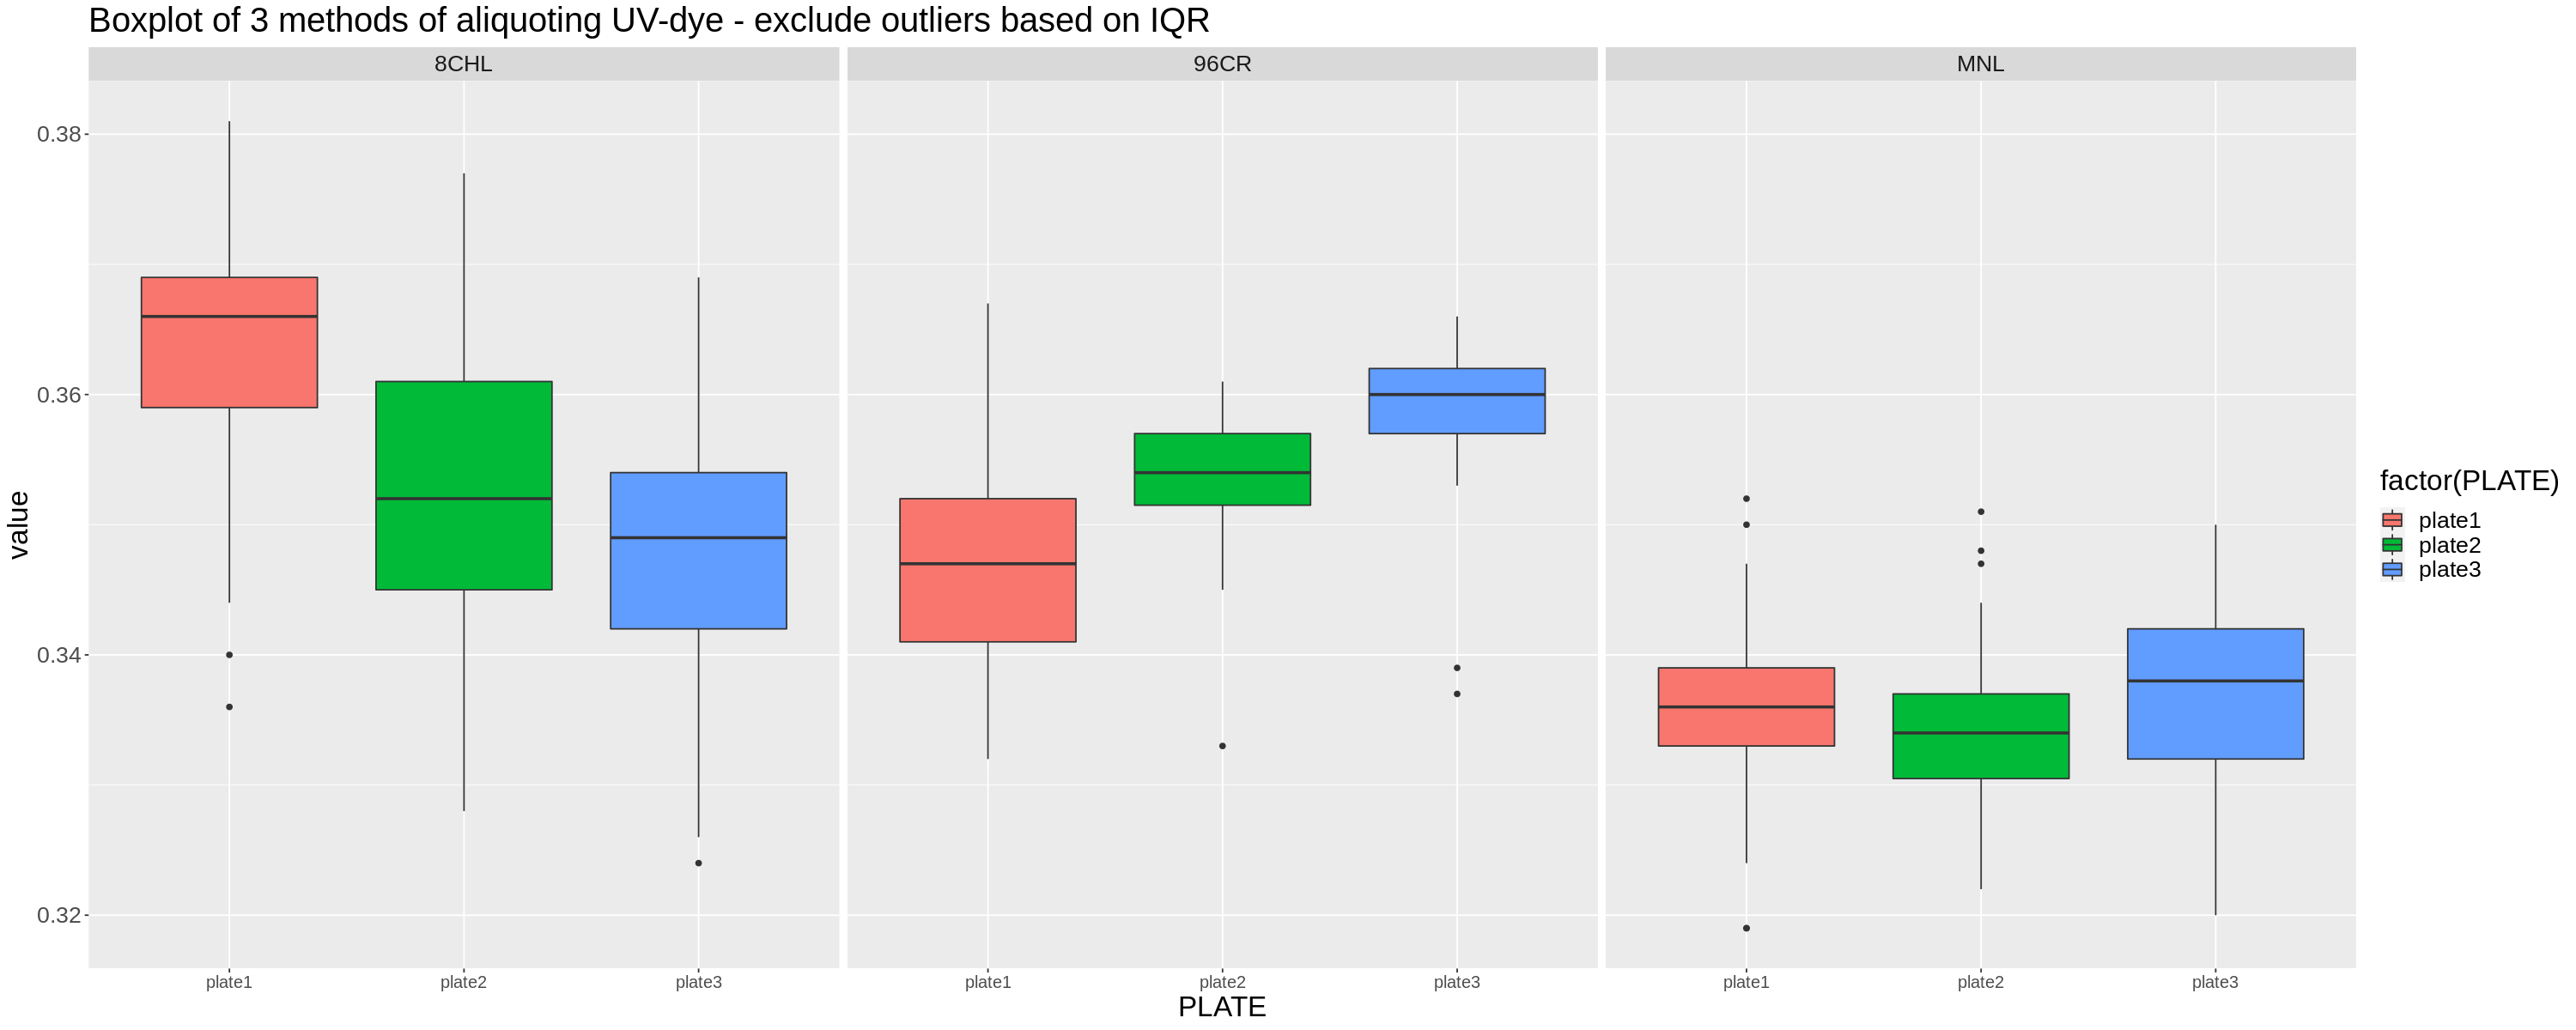

In [76]:
# box plot without outliers using IQR criterion
ggplot(dff, aes(x=PLATE,y=value, group = PLATE, fill = factor(PLATE))) +
  geom_boxplot() + 
  labs(title="Boxplot of 3 methods of aliquoting UV-dye - exclude outliers based on IQR criterion") +
  facet_wrap(~METHOD) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) 

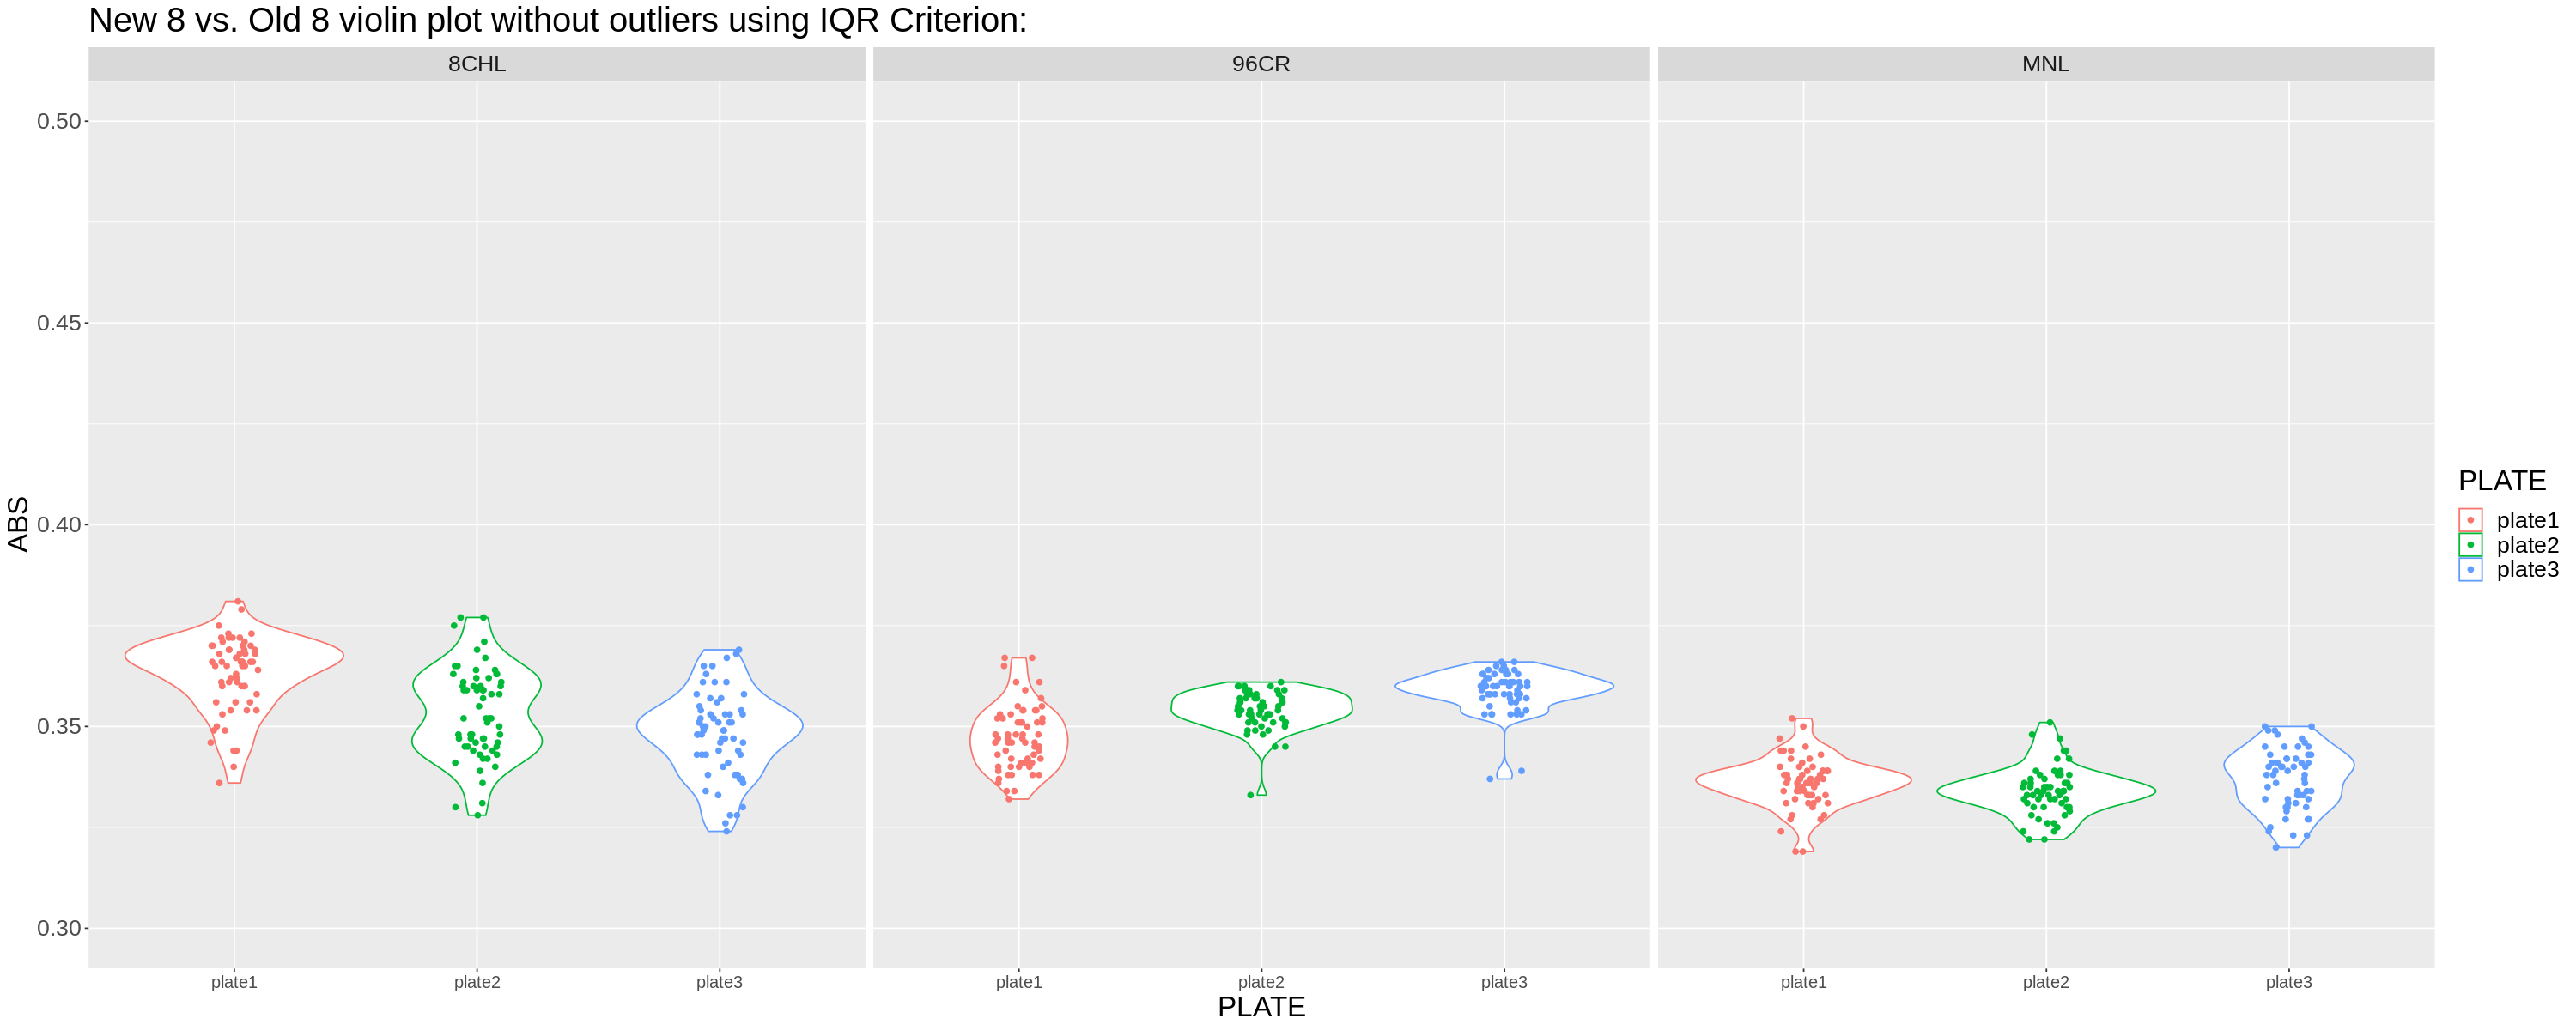

In [14]:
# violin plot without outliers using IQR Criterion 
ggplot(dff, aes(x=PLATE,y=value, colour = PLATE)) +
    geom_violin(aes(colour = PLATE)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("New 8 vs. Old 8 violin plot without outliers using IQR Criterion:" ) +
    ylab("ABS") +
    ylim(c(0.3,0.5)) + 
    facet_wrap(~ METHOD) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) 

In [17]:
# outliers based on Hempel filter
bounds_ls <- list()
bounds_idx_ls <- list()
i = 1
for (m in method_ls) {
    data = dfl %>% filter(METHOD == m) %>% select(value) %>% pull
    bounds_ls[[i]] <- c(median(data) - 3 * mad(data, constant = 1), median(data) + 3 * mad(data, constant = 1))
    bounds_idx_ls[[i]] <- which(data < bounds_ls[[i]][1] | data > bounds_ls[[i]][2])
    i = i + 1
}

In [18]:
bounds_ls

[[1]]
[1] 0.329 0.383

[[2]]
[1] 0.323 0.347

[[3]]
[1] 0.336 0.372

In [80]:
bounds_idx_ls

[[1]]
[1]  17  18  21  41 103 111 116 177

[[2]]
 [1]   8   9  13  29  40  65  69  72  85  87  92  94 100 104 111 115 120 133 134
[20] 149 151 163 167 181 186 189 191

[[3]]
 [1] 100 157 161 171 172 174 177 179 180 181 184 185 186 187

In [19]:
# hempel filter criterion filter
df_ls <- list()
for (i in seq(3)) {
    df_ls[[i]] <- dfl %>% filter(METHOD == method_ls[i],
               value > bounds_ls[[i]][1] & value < bounds_ls[[i]][2])
    }
dff_hf <- do.call(rbind, df_ls)
head(dff)

,METHOD,PLATE,COL,value
,<chr>,<chr>,<fct>,<dbl>
1,8CHL,plate1,X1,0.375
2,8CHL,plate1,X1,0.368
3,8CHL,plate1,X1,0.370
4,8CHL,plate1,X1,0.367
5,8CHL,plate1,X1,0.372
6,8CHL,plate1,X1,0.368


In [85]:
nrow(dff)

[1] 525

In [86]:
nrow(dfl)

[1] 576

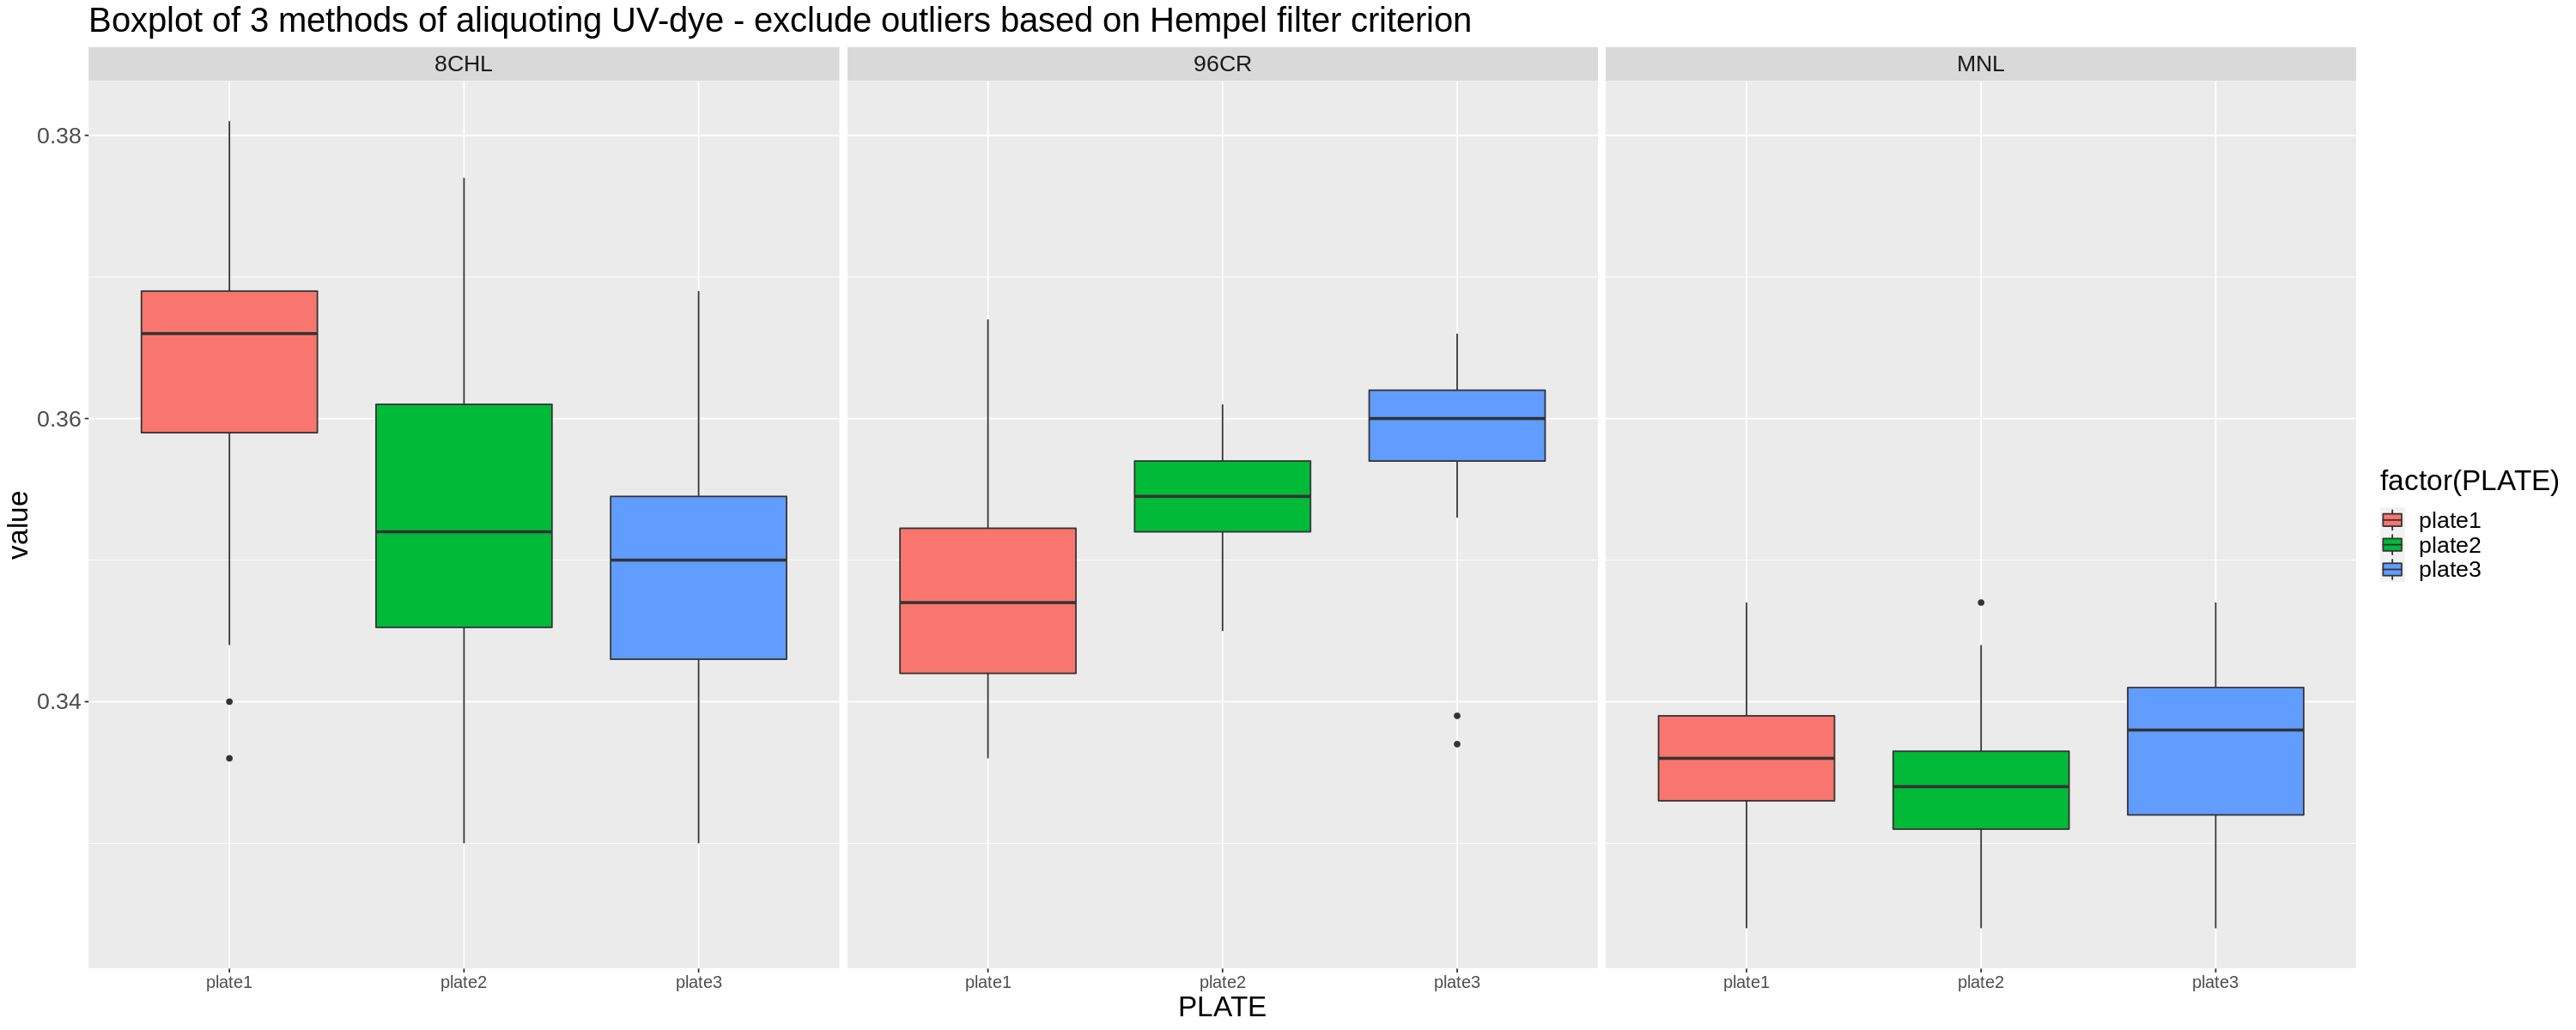

In [84]:
# box plot without outliers using Hempel filter criterion
ggplot(dff, aes(x=PLATE,y=value, group = PLATE, fill = factor(PLATE))) +
  geom_boxplot() + 
  labs(title="Boxplot of 3 methods of aliquoting UV-dye - exclude outliers based on Hempel filter criterion") +
  facet_wrap(~METHOD) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) 

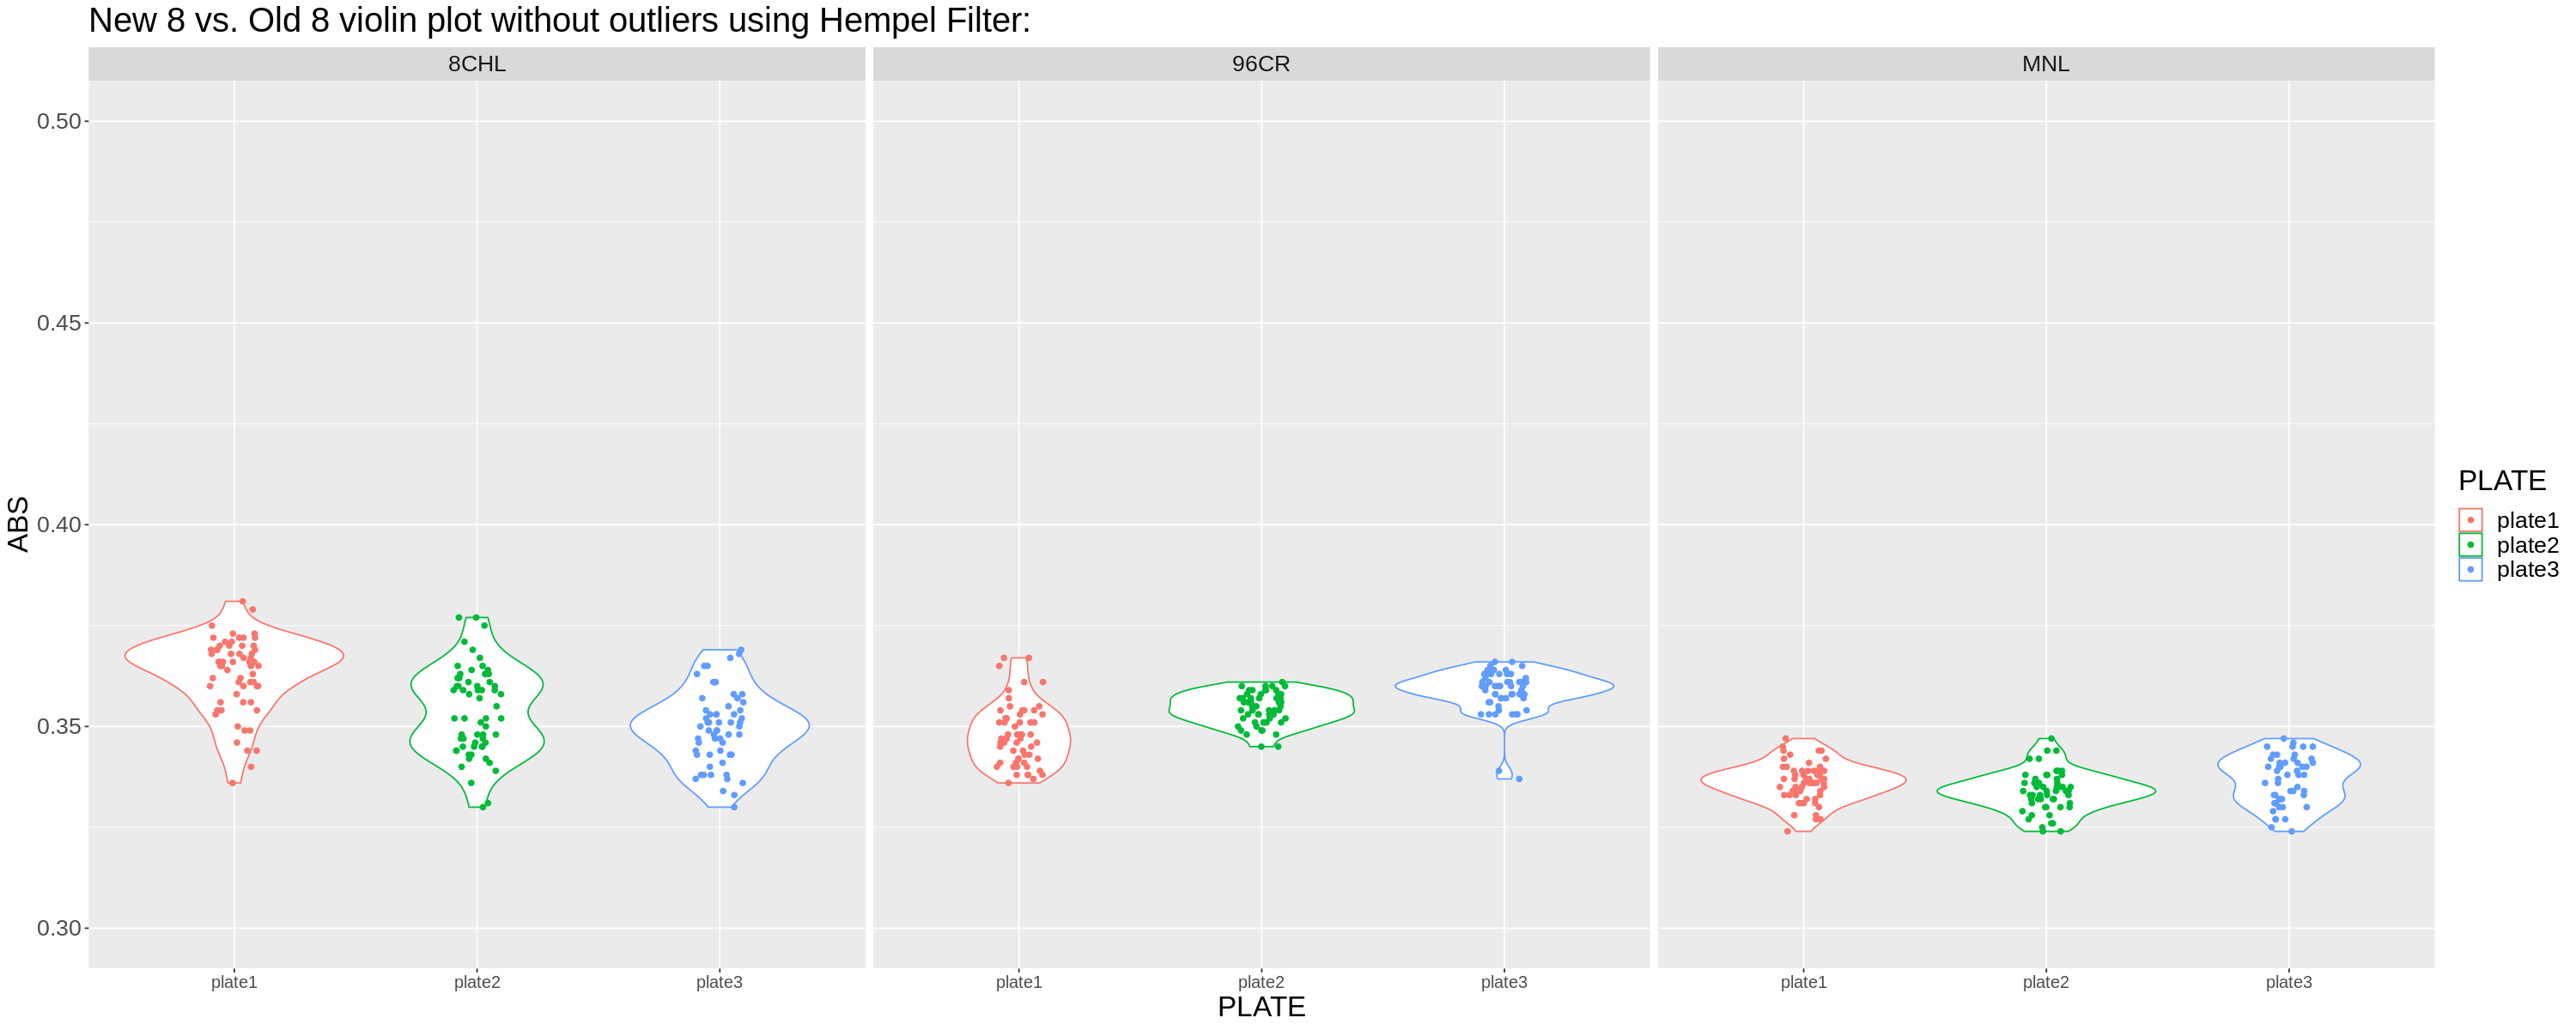

In [20]:
# violin plot without outliers using Hempel filter
ggplot(dff_hf, aes(x=PLATE,y=value, colour = PLATE)) +
    geom_violin(aes(colour = PLATE)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("New 8 vs. Old 8 violin plot without outliers using Hempel Filter:" ) +
    ylab("ABS") +
    ylim(c(0.3,0.5)) + 
    facet_wrap(~ METHOD) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) 

In [100]:
# re run stats to see if removing outliers help (IQR)
df.t.o.iqr <- list()
for (i in seq(3)) {
    df.t.o.iqr[[i]] <- dff %>% filter(METHOD == method_ls[i] ) %>%
        select(value) %>% pull()
    }


for (i in seq(3)) {
    idx = ftest_pair_ls[i]
    i1 = idx[[1]][1]
    i2 = idx[[1]][2]
    df_stats[i, "PLATE_PAIR"] = paste0(i1, "-", i2)
    df_stats[i, "METHOD"] = paste0(method_ls[i1], "-", method_ls[i2])
    print(paste("F-TEST", i1, i2))
    print(paste(method_ls[i1], "vs", method_ls[i2]))
    stat <- var.test(df.t.o.iqr[[i1]], df.t.o.iqr[[i2]])
    df_stats[i, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_FT"] = stat$p.value > 0.05
    print(stat)
    print(paste("WILCOXON TEST", i1, i2))
    stat <- wilcox.test(x = df.t.o.iqr[[i1]],
                      y = df.t.o.iqr[[i2]],
           alternative = "two.sided",
           paired = FALSE, var.equal = T,
           conf.level = 0.95) 
    df_stats[i, "WILCOXON_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_WX"] = stat$p.value > 0.05
    print(stat)
    stat <- t.test(x = df.t.o.iqr[[i1]],
                 y = df.t.o.iqr[[i2]],
          alternative = "two.sided",
          paired = FALSE, var.equal = T,
          conf.level = 0.95) 
    df_stats[i, "T_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_TT"] = stat$p.value > 0.05
    print(stat)
}
#df_stats
write.csv(df_stats, "uv-vis_stats_iqr_outliers.csv", row.names = FALSE)

[1] "F-TEST 1 2"
[1] "8CHL vs MNL"

	F test to compare two variances

data:  df.t.o.iqr[[i1]] and df.t.o.iqr[[i2]]
F = 3.2163, num df = 188, denom df = 178, p-value = 2.176e-14
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.403314 4.299145
sample estimates:
ratio of variances 
          3.216254 

[1] "WILCOXON TEST 1 2"

	Wilcoxon rank sum test with continuity correction

data:  df.t.o.iqr[[i1]] and df.t.o.iqr[[i2]]
W = 30813, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  df.t.o.iqr[[i1]] and df.t.o.iqr[[i2]]
t = 18.705, df = 366, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01707339 0.02108492
sample estimates:
mean of x mean of y 
0.3547831 0.3357039 

[1] "F-TEST 2 3"
[1] "MNL vs 96CR"

	F test to compare two variances

data:  df.t.o.iqr[[i1]] and df.t.o.iqr[[i2]]
F = 0.73713, num df = 178, de

In [101]:
# re run stats to see if removing outliers help (Hempel filter)
df.t.o.hf <- list()
for (i in seq(3)) {
    df.t.o.hf[[i]] <- dff_hf %>% filter(METHOD == method_ls[i] ) %>%
        select(value) %>% pull()
    }


for (i in seq(3)) {
    idx = ftest_pair_ls[i]
    i1 = idx[[1]][1]
    i2 = idx[[1]][2]
    df_stats[i, "PLATE_PAIR"] = paste0(i1, "-", i2)
    df_stats[i, "METHOD"] = paste0(method_ls[i1], "-", method_ls[i2])
    print(paste("F-TEST", i1, i2))
    print(paste(method_ls[i1], "vs", method_ls[i2]))
    stat <- var.test(df.t.o.hf[[i1]], df.t.o.hf[[i2]])
    df_stats[i, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_FT"] = stat$p.value > 0.05
    print(stat)
    print(paste("WILCOXON TEST", i1, i2))
    stat <- wilcox.test(x = df.t.o.hf[[i1]],
                      y = df.t.o.hf[[i2]],
           alternative = "two.sided",
           paired = FALSE, var.equal = T,
           conf.level = 0.95) 
    df_stats[i, "WILCOXON_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_WX"] = stat$p.value > 0.05
    print(stat)
    stat <- t.test(x = df.t.o.hf[[i1]],
                 y = df.t.o.hf[[i2]],
          alternative = "two.sided",
          paired = FALSE, var.equal = T,
          conf.level = 0.95) 
    df_stats[i, "T_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
    df_stats[i, "GT_A_TT"] = stat$p.value > 0.05
    print(stat)
}
#df_stats
write.csv(df_stats, "uv-vis_stats_hempelf_outliers.csv", row.names = FALSE)

[1] "F-TEST 1 2"
[1] "8CHL vs MNL"

	F test to compare two variances

data:  df.t.o.hf[[i1]] and df.t.o.hf[[i2]]
F = 4.3466, num df = 183, denom df = 162, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 3.215575 5.859270
sample estimates:
ratio of variances 
          4.346638 

[1] "WILCOXON TEST 1 2"

	Wilcoxon rank sum test with continuity correction

data:  df.t.o.hf[[i1]] and df.t.o.hf[[i2]]
W = 28339, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  df.t.o.hf[[i1]] and df.t.o.hf[[i2]]
t = 20.737, df = 345, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.01808965 0.02188074
sample estimates:
mean of x mean of y 
0.3555435 0.3355583 

[1] "F-TEST 2 3"
[1] "MNL vs 96CR"

	F test to compare two variances

data:  df.t.o.hf[[i1]] and df.t.o.hf[[i2]]
F = 0.548, num df = 162, denom df = 177

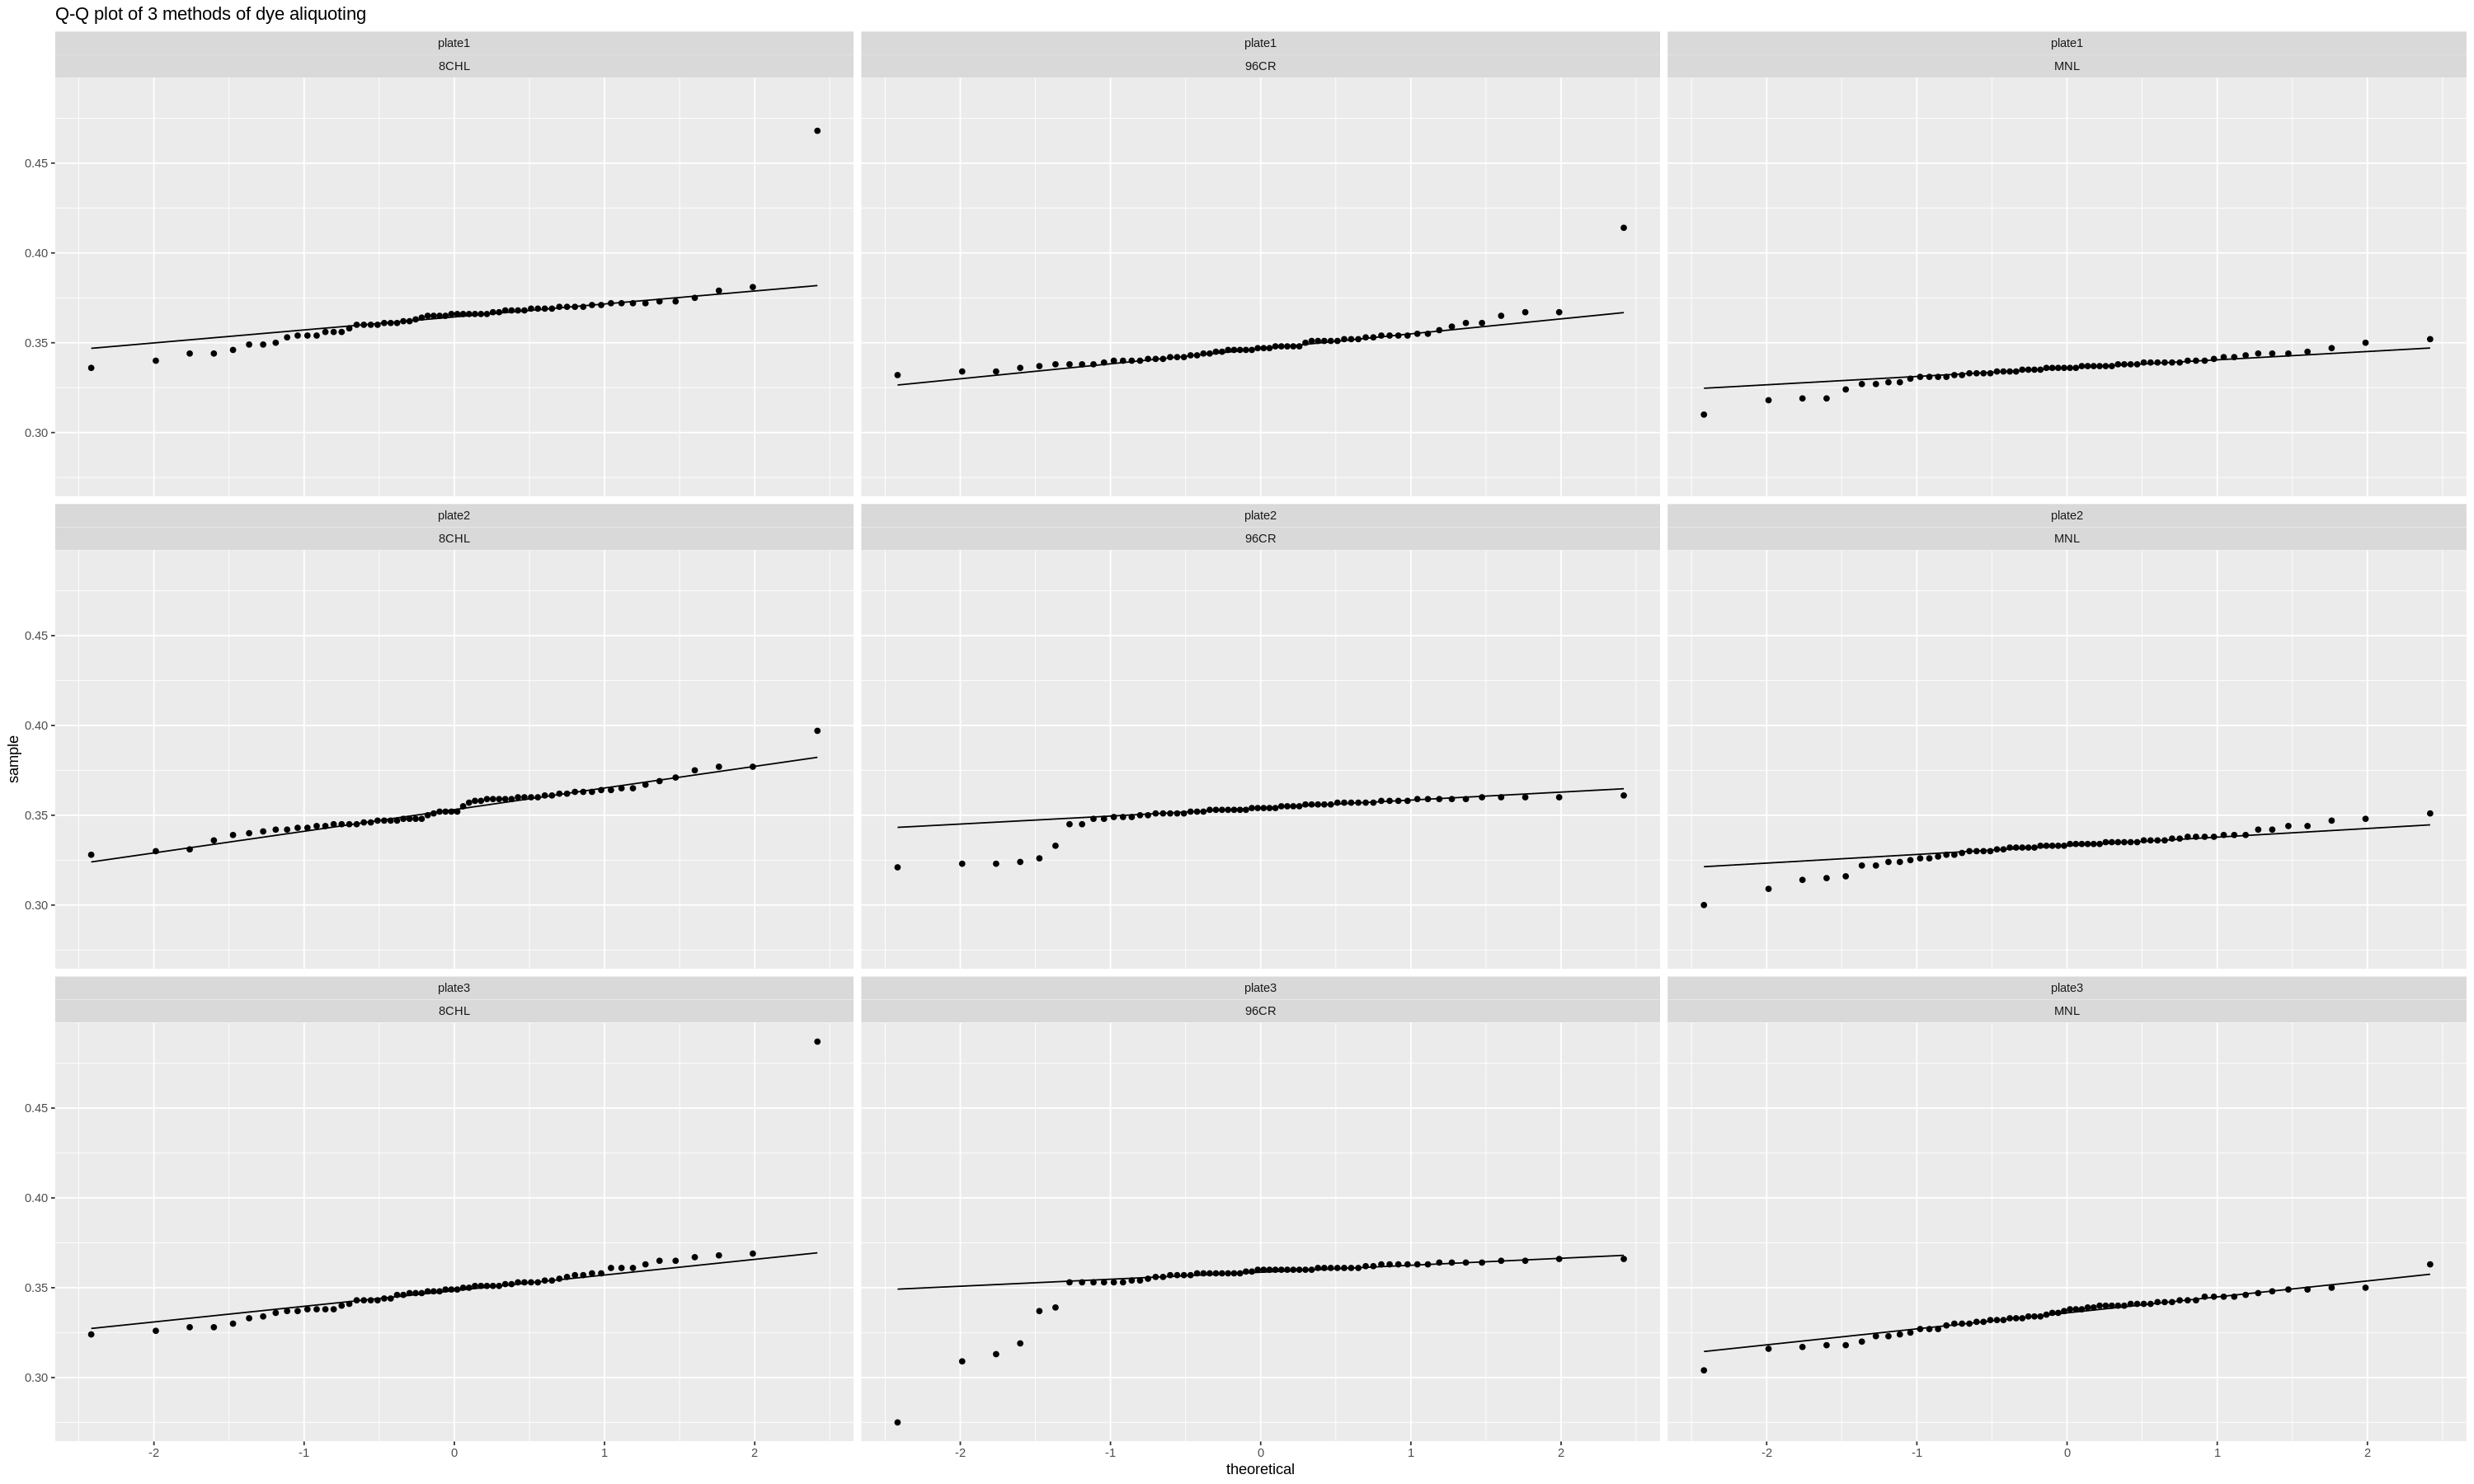

In [205]:
# qq plot
ggplot(dfl, aes(sample = value)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(PLATE~ METHOD) +
            ggtitle("Q-Q plot of 3 methods of dye aliquoting")

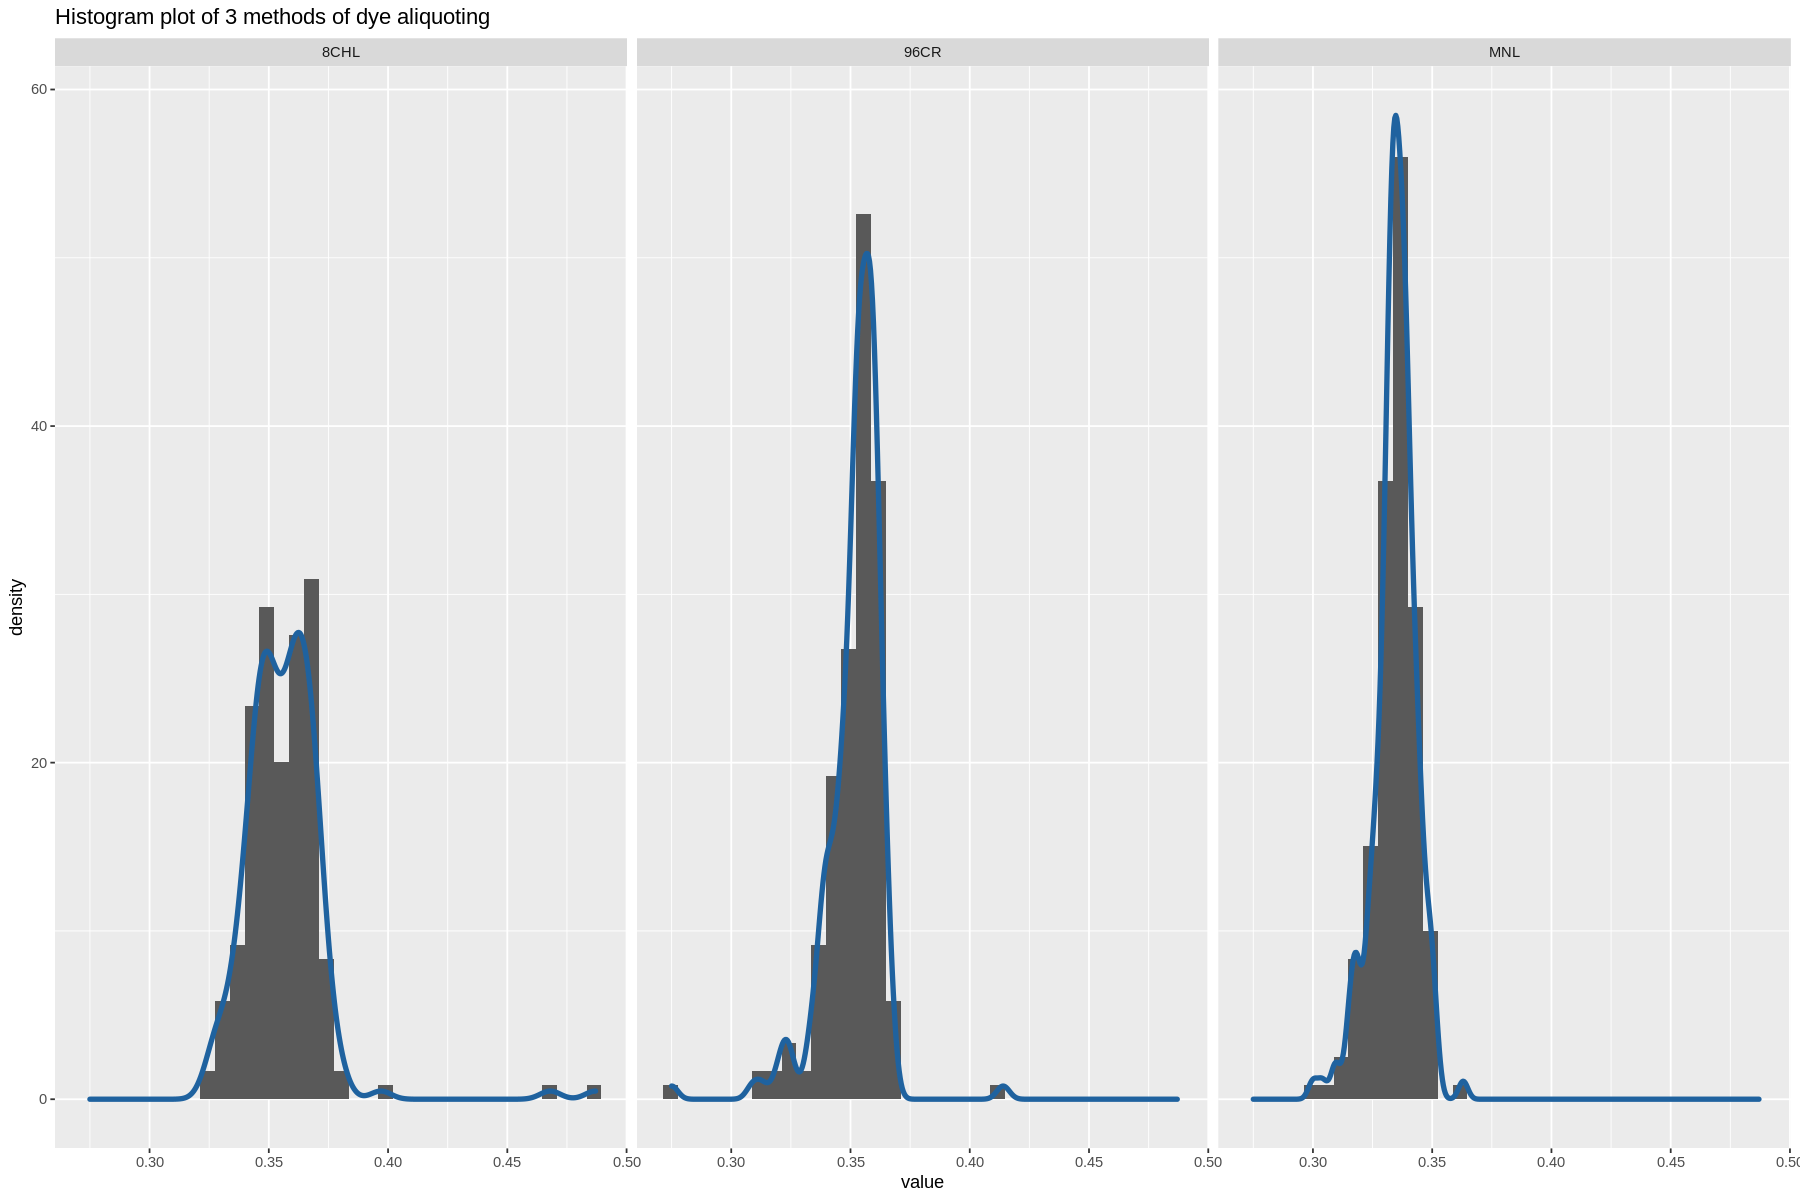

In [71]:
# histogrm plot
ggplot(data = dfl, aes(x = value)) +
    geom_histogram(aes(y = ..density..), bins = 35, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(~ METHOD) +
    ggtitle("Histogram plot of 3 methods of dye aliquoting")

#### Boxplot

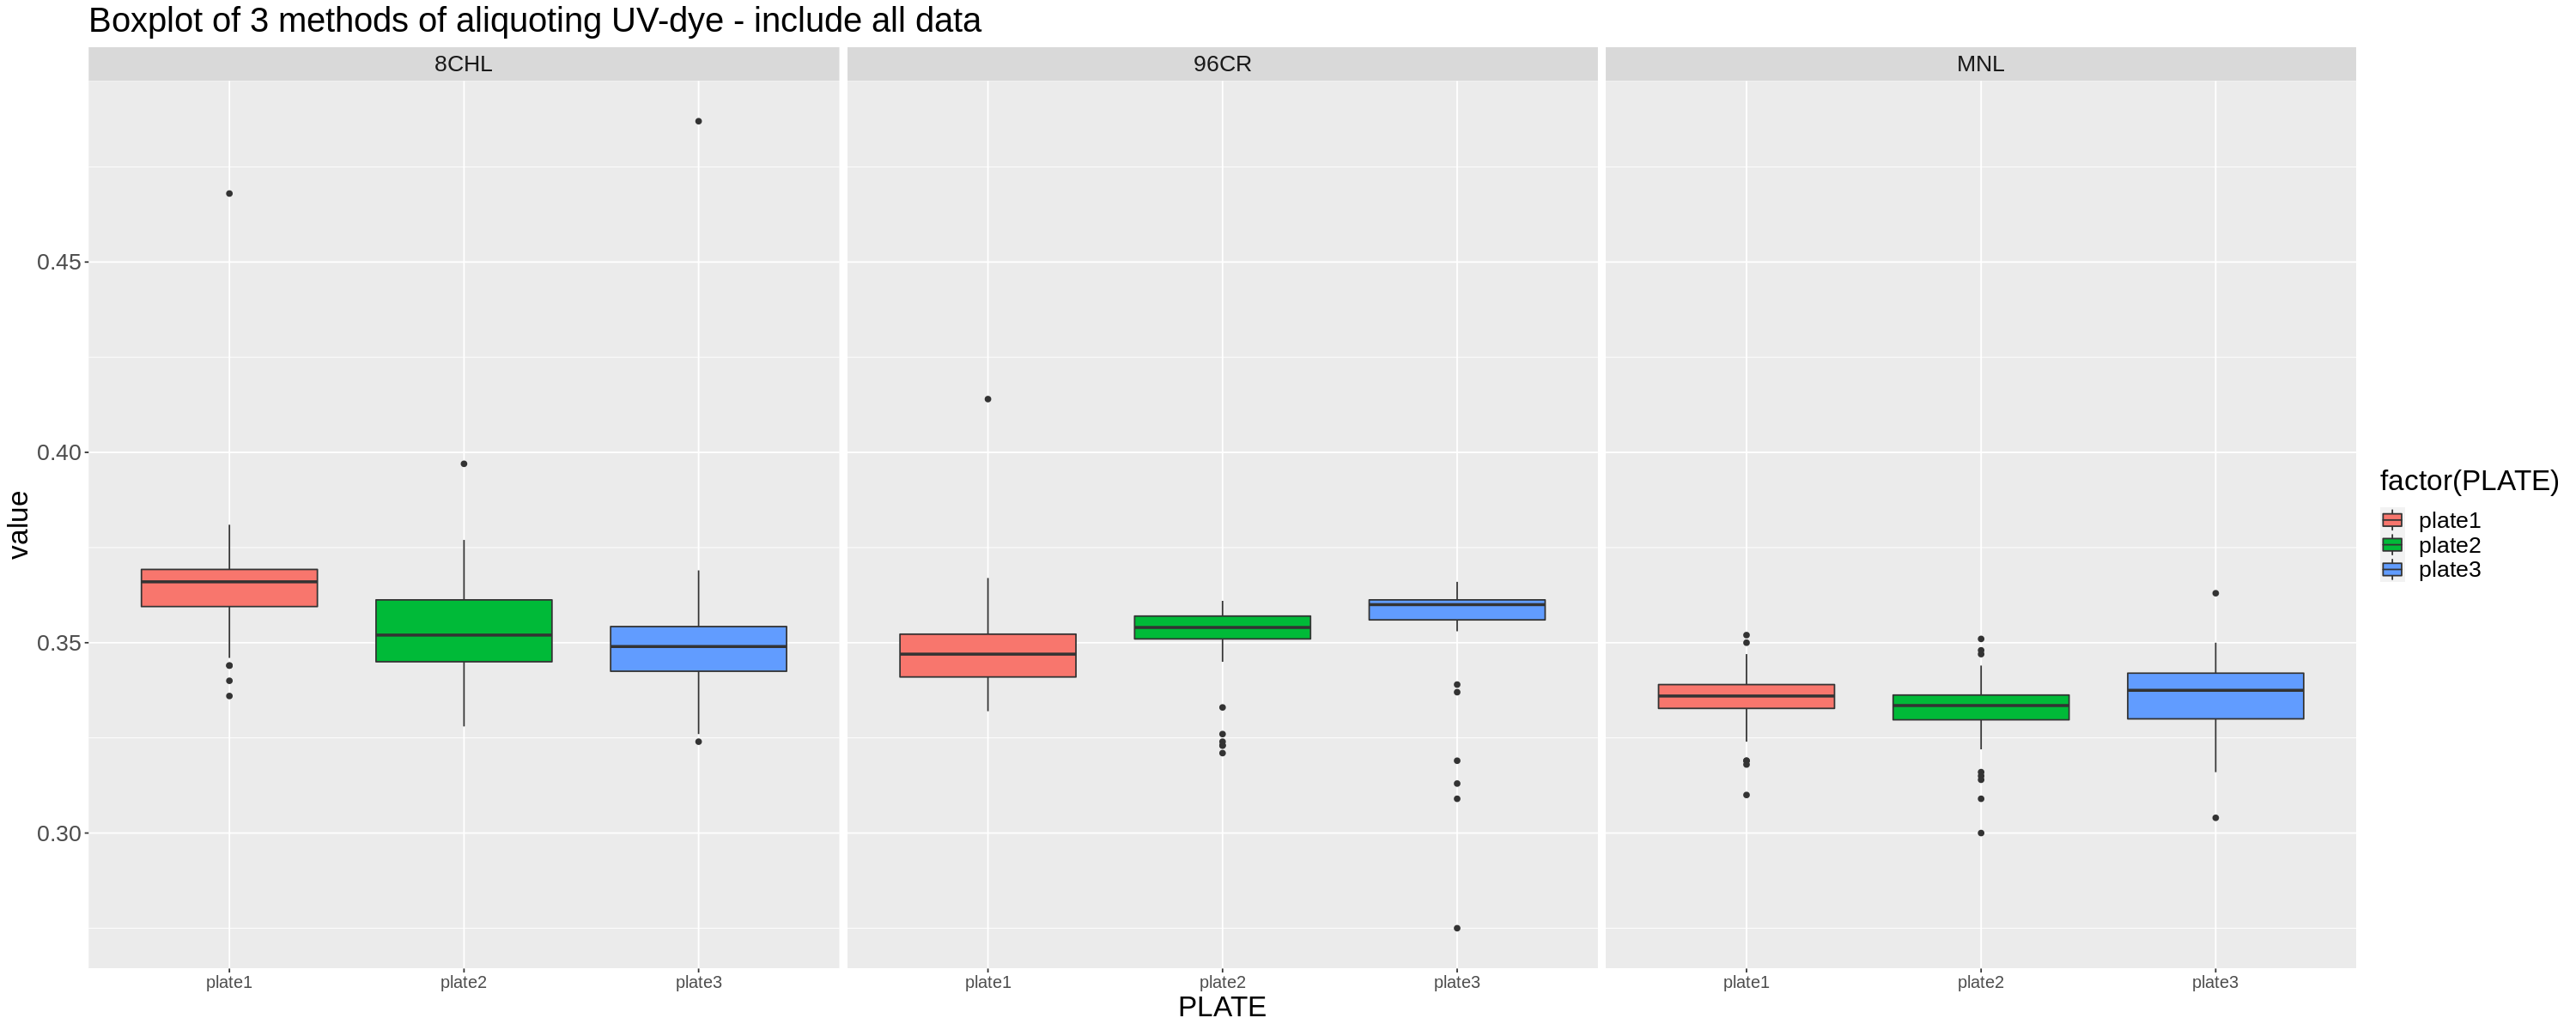

In [109]:
ggplot(dfl, aes(x=PLATE,y=value, group = PLATE, fill = factor(PLATE))) +
  geom_boxplot() + 
  labs(title="Boxplot of 3 methods of aliquoting UV-dye - include all data") +
  facet_wrap(~METHOD) +
  theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) 

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


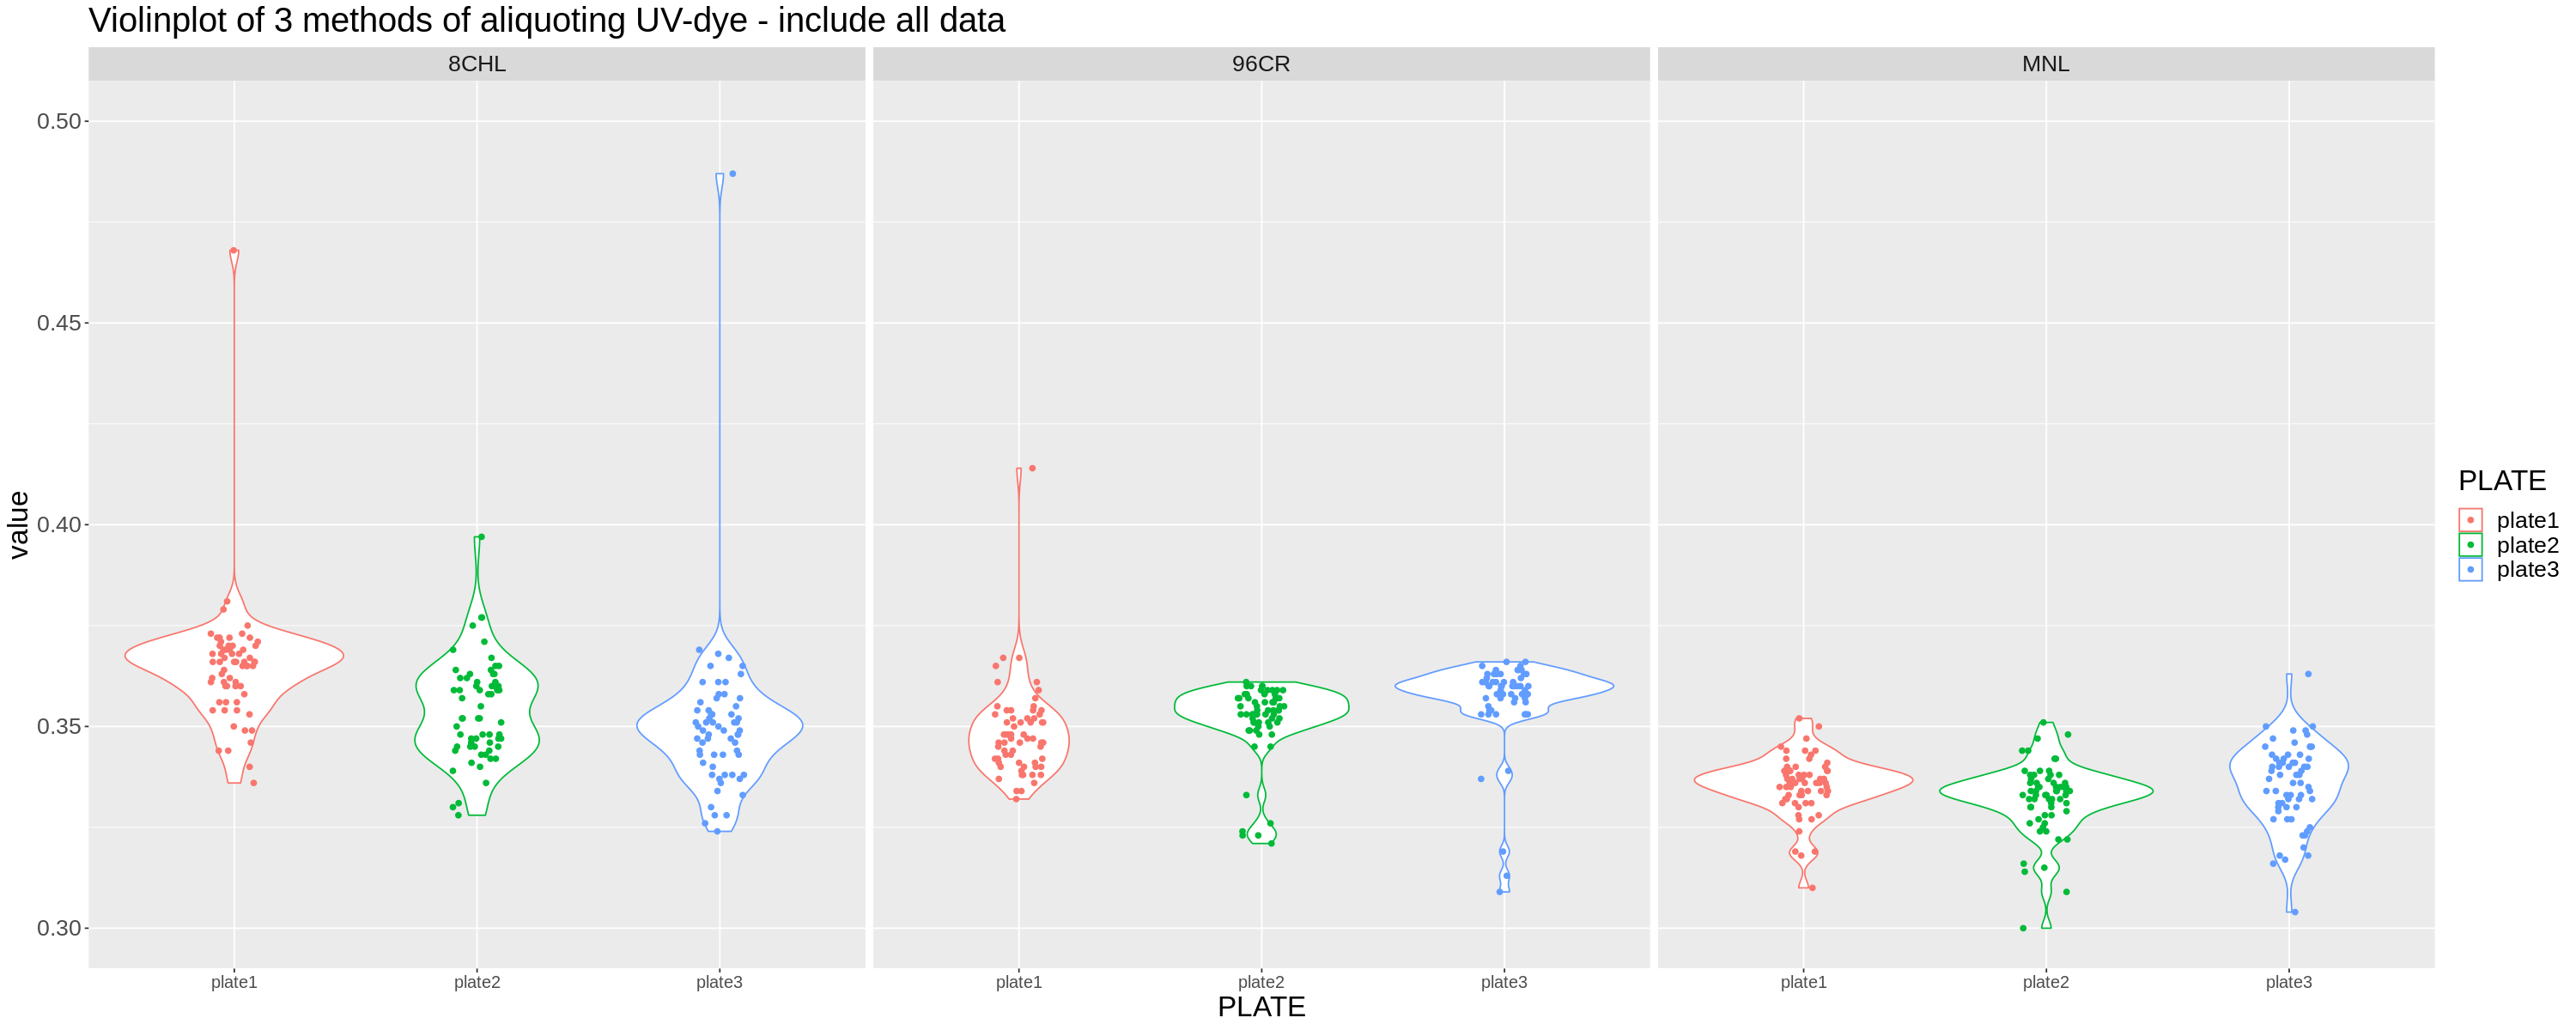

In [13]:
ggplot(dfl, aes(x=PLATE,y=value, colour = PLATE)) +
    geom_violin(aes(colour = PLATE)) + 
    geom_jitter(height = 0, width = 0.1) +
    labs(title="Violinplot of 3 methods of aliquoting UV-dye - include all data") +
    facet_wrap(~ METHOD) +
    ylim(c(0.3, 0.5)) + 
    theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) 

In [7]:
summary(dfl %>% filter(METHOD == "8CHL") %>% select(value))

     value       
 Min.   :0.3240  
 1st Qu.:0.3468  
 Median :0.3560  
 Mean   :0.3563  
 3rd Qu.:0.3650  
 Max.   :0.4870  

In [12]:
sd(dfl %>% filter(METHOD == "8CHL") %>% select(value) %>% pull())

[1] 0.01753005

In [87]:
summary(dfl %>% filter(METHOD == "96CR") %>% select(value))

     value       
 Min.   :0.2750  
 1st Qu.:0.3478  
 Median :0.3540  
 Mean   :0.3518  
 3rd Qu.:0.3590  
 Max.   :0.4140  

In [14]:
sd(dfl %>% filter(METHOD == "96CR") %>% select(value) %>% pull())

[1] 0.01244726

In [88]:
summary(dfl %>% filter(METHOD == "MNL") %>% select(value))

     value       
 Min.   :0.3000  
 1st Qu.:0.3310  
 Median :0.3350  
 Mean   :0.3344  
 3rd Qu.:0.3392  
 Max.   :0.3630  

In [15]:
sd(dfl %>% filter(METHOD == "MNL") %>% select(value) %>% pull())

[1] 0.008865141

In [94]:
res.aov <- aov(value ~ METHOD, data = dfl)
print(summary(res.aov))
print("Tukey")
print(paste0(rep("-", 25), collapse=""))
print(TukeyHSD(res.aov))
print("Pairwise")
print(paste0(rep("-", 25), collapse=""))

             Df  Sum Sq Mean Sq F value Pr(>F)    
METHOD        2 0.05114 0.02557   141.8 <2e-16 ***
Residuals   573 0.10330 0.00018                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ METHOD, data = dfl)

$METHOD
                  diff          lwr          upr     p adj
96CR-8CHL -0.004515625 -0.007735709 -0.001295541 0.0029949
MNL-8CHL  -0.021859375 -0.025079459 -0.018639291 0.0000000
MNL-96CR  -0.017343750 -0.020563834 -0.014123666 0.0000000

[1] "Pairwise"
[1] "-------------------------"


In [100]:
# outliers
df.t <- dfl %>% filter(METHOD == "8CHL") %>% select(value) %>% pull()
print(FindOutliersTietjenMooreTest(df.t,2))

$T
[1] 0.4909632

$Talpha
       5% 
0.8872174 



In [101]:
df.t <- dfl %>% filter(METHOD == "96CR") %>% select(value) %>% pull()
print(FindOutliersTietjenMooreTest(df.t,2))

$T
[1] 0.6699432

$Talpha
       5% 
0.8881546 



In [102]:
df.t <- dfl %>% filter(METHOD == "MNL") %>% select(value) %>% pull()
print(FindOutliersTietjenMooreTest(df.t,2))

$T
[1] 0.8579368

$Talpha
       5% 
0.8876302 



In [111]:
dfm <- dfl %>% mutate(index = rep(seq(192),3)) #  8*3*8 rows * triplicates * columns
head(dfm)

,METHOD,PLATE,COL,value,index
,<chr>,<chr>,<fct>,<dbl>,<int>
1,8CHL,plate1,X1,0.375,1
2,8CHL,plate1,X1,0.368,2
3,8CHL,plate1,X1,0.370,3
4,8CHL,plate1,X1,0.367,4
5,8CHL,plate1,X1,0.372,5
6,8CHL,plate1,X1,0.368,6


In [116]:
# for IQR criterion
for (i in seq(3)) {
    print(nrow(dff %>% filter(METHOD == method_ls[i])))
    }

[1] 189
[1] 179
[1] 182


In [117]:
dffm <- dff %>% mutate(index = c(seq(189), seq(179), seq(182)))

In [120]:
for (i in seq(3)) {
    print(nrow(dff_hf %>% filter(METHOD == method_ls[i])))
    }

[1] 184
[1] 163
[1] 178


In [121]:
dffm_hf <- dff_hf %>% mutate(index = c(seq(184), seq(163), seq(178)))

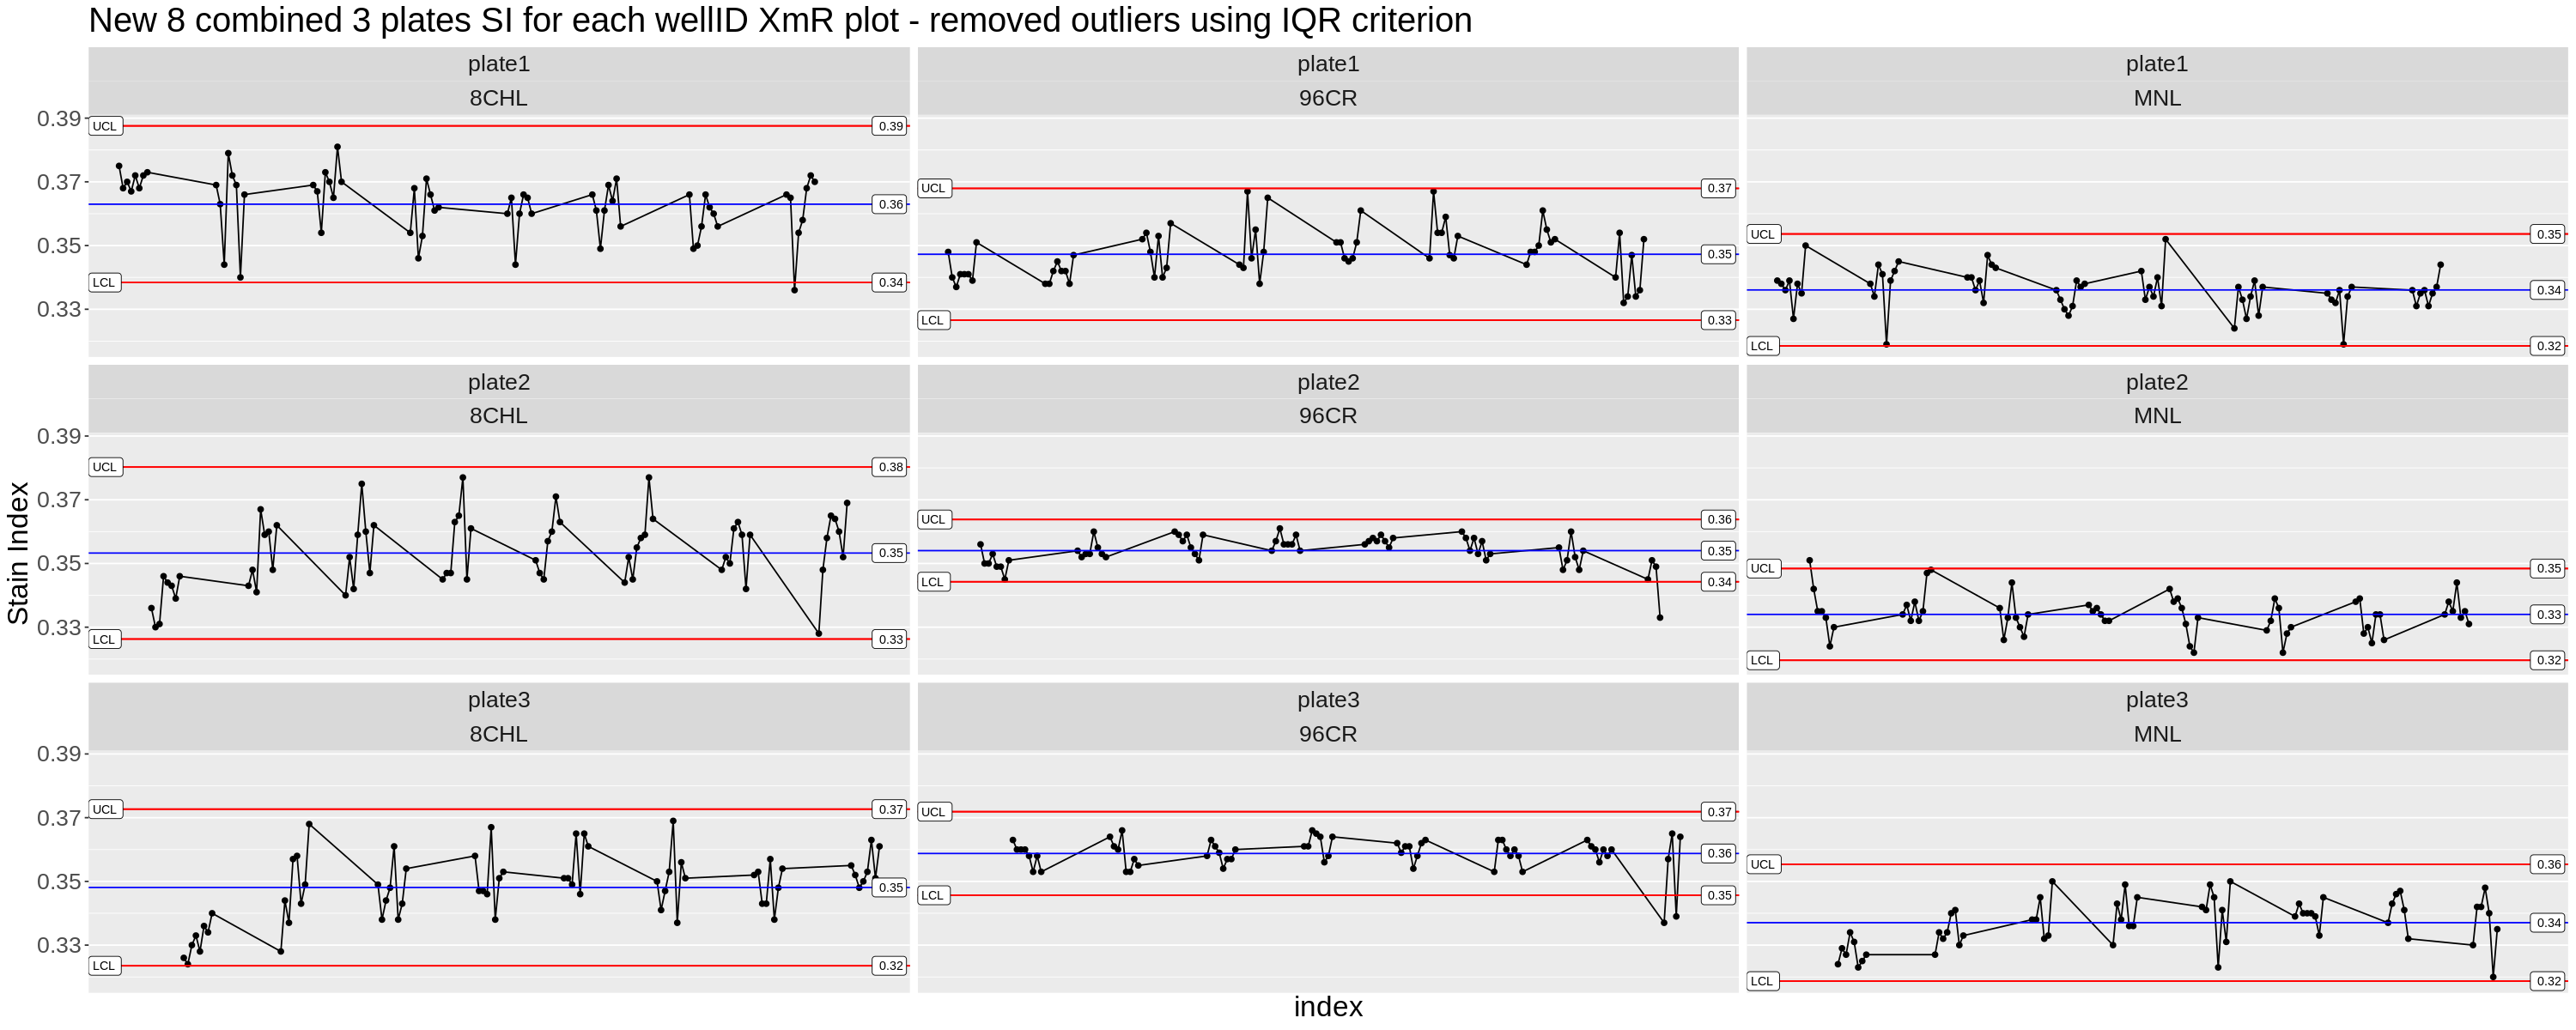

In [119]:
# IQR criterion
ggplot(dffm, aes(x=index, y=value, group = METHOD)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("Stain Index") +
  scale_x_discrete(expand =  expansion(mult = .04)) + 
  facet_wrap(PLATE~ METHOD) + 
  ggtitle("New 8 combined 3 plates SI for each wellID XmR plot - removed outliers using IQR criterion") +
  theme(text = element_text(size=20),
        axis.text.x = element_text(size = 8, angle = 90))

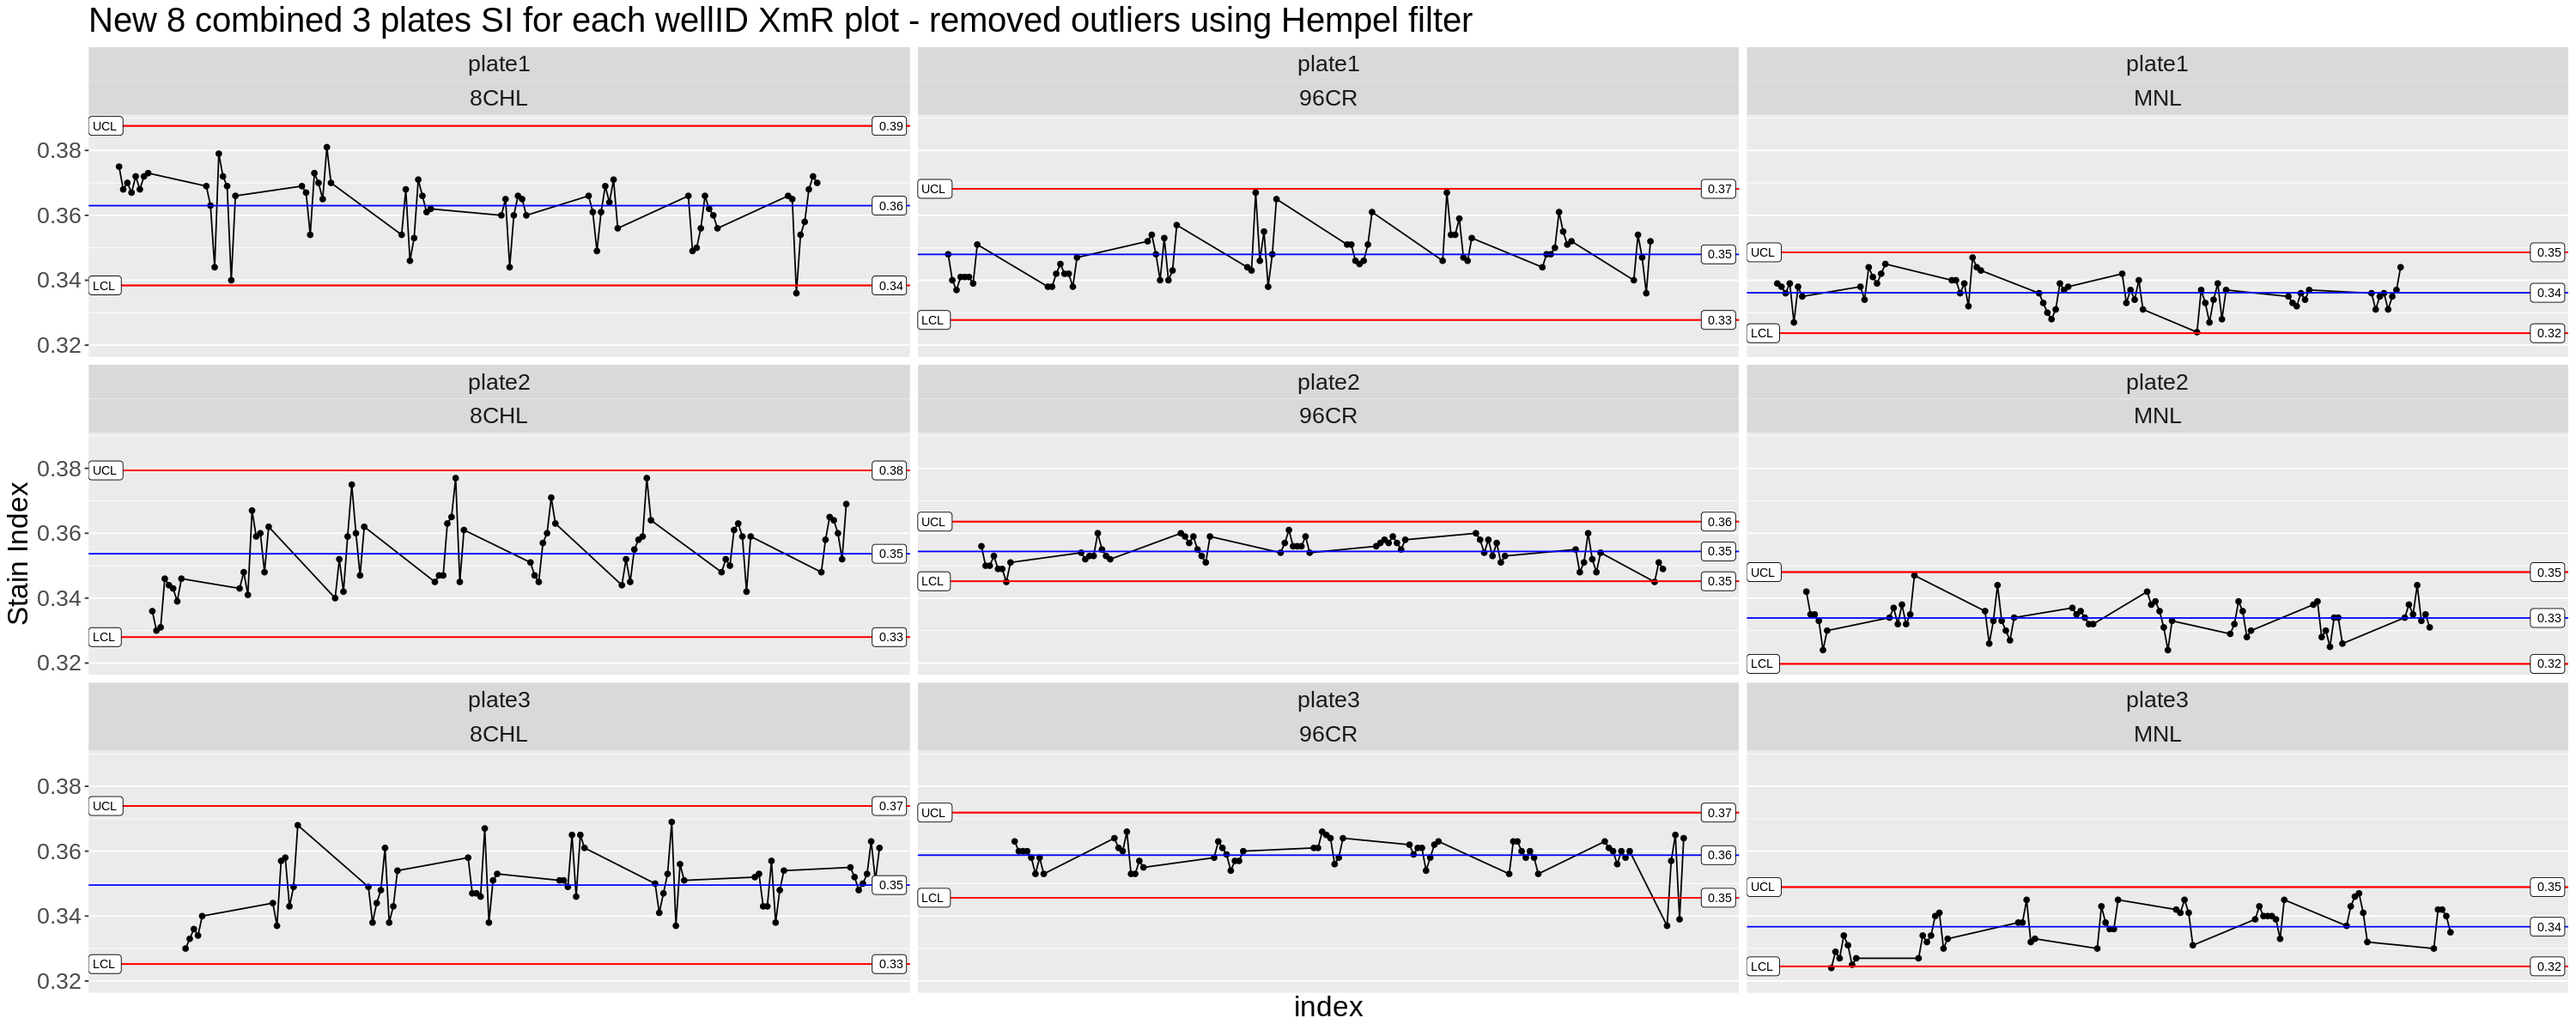

In [123]:
# Hempel filter 
ggplot(dffm_hf, aes(x=index, y=value, group = METHOD)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("Stain Index") +
  scale_x_discrete(expand =  expansion(mult = .04)) + 
  facet_wrap(PLATE~ METHOD) + 
  ggtitle("New 8 combined 3 plates SI for each wellID XmR plot - removed outliers using Hempel filter") +
  theme(text = element_text(size=20),
        axis.text.x = element_text(size = 8, angle = 90))

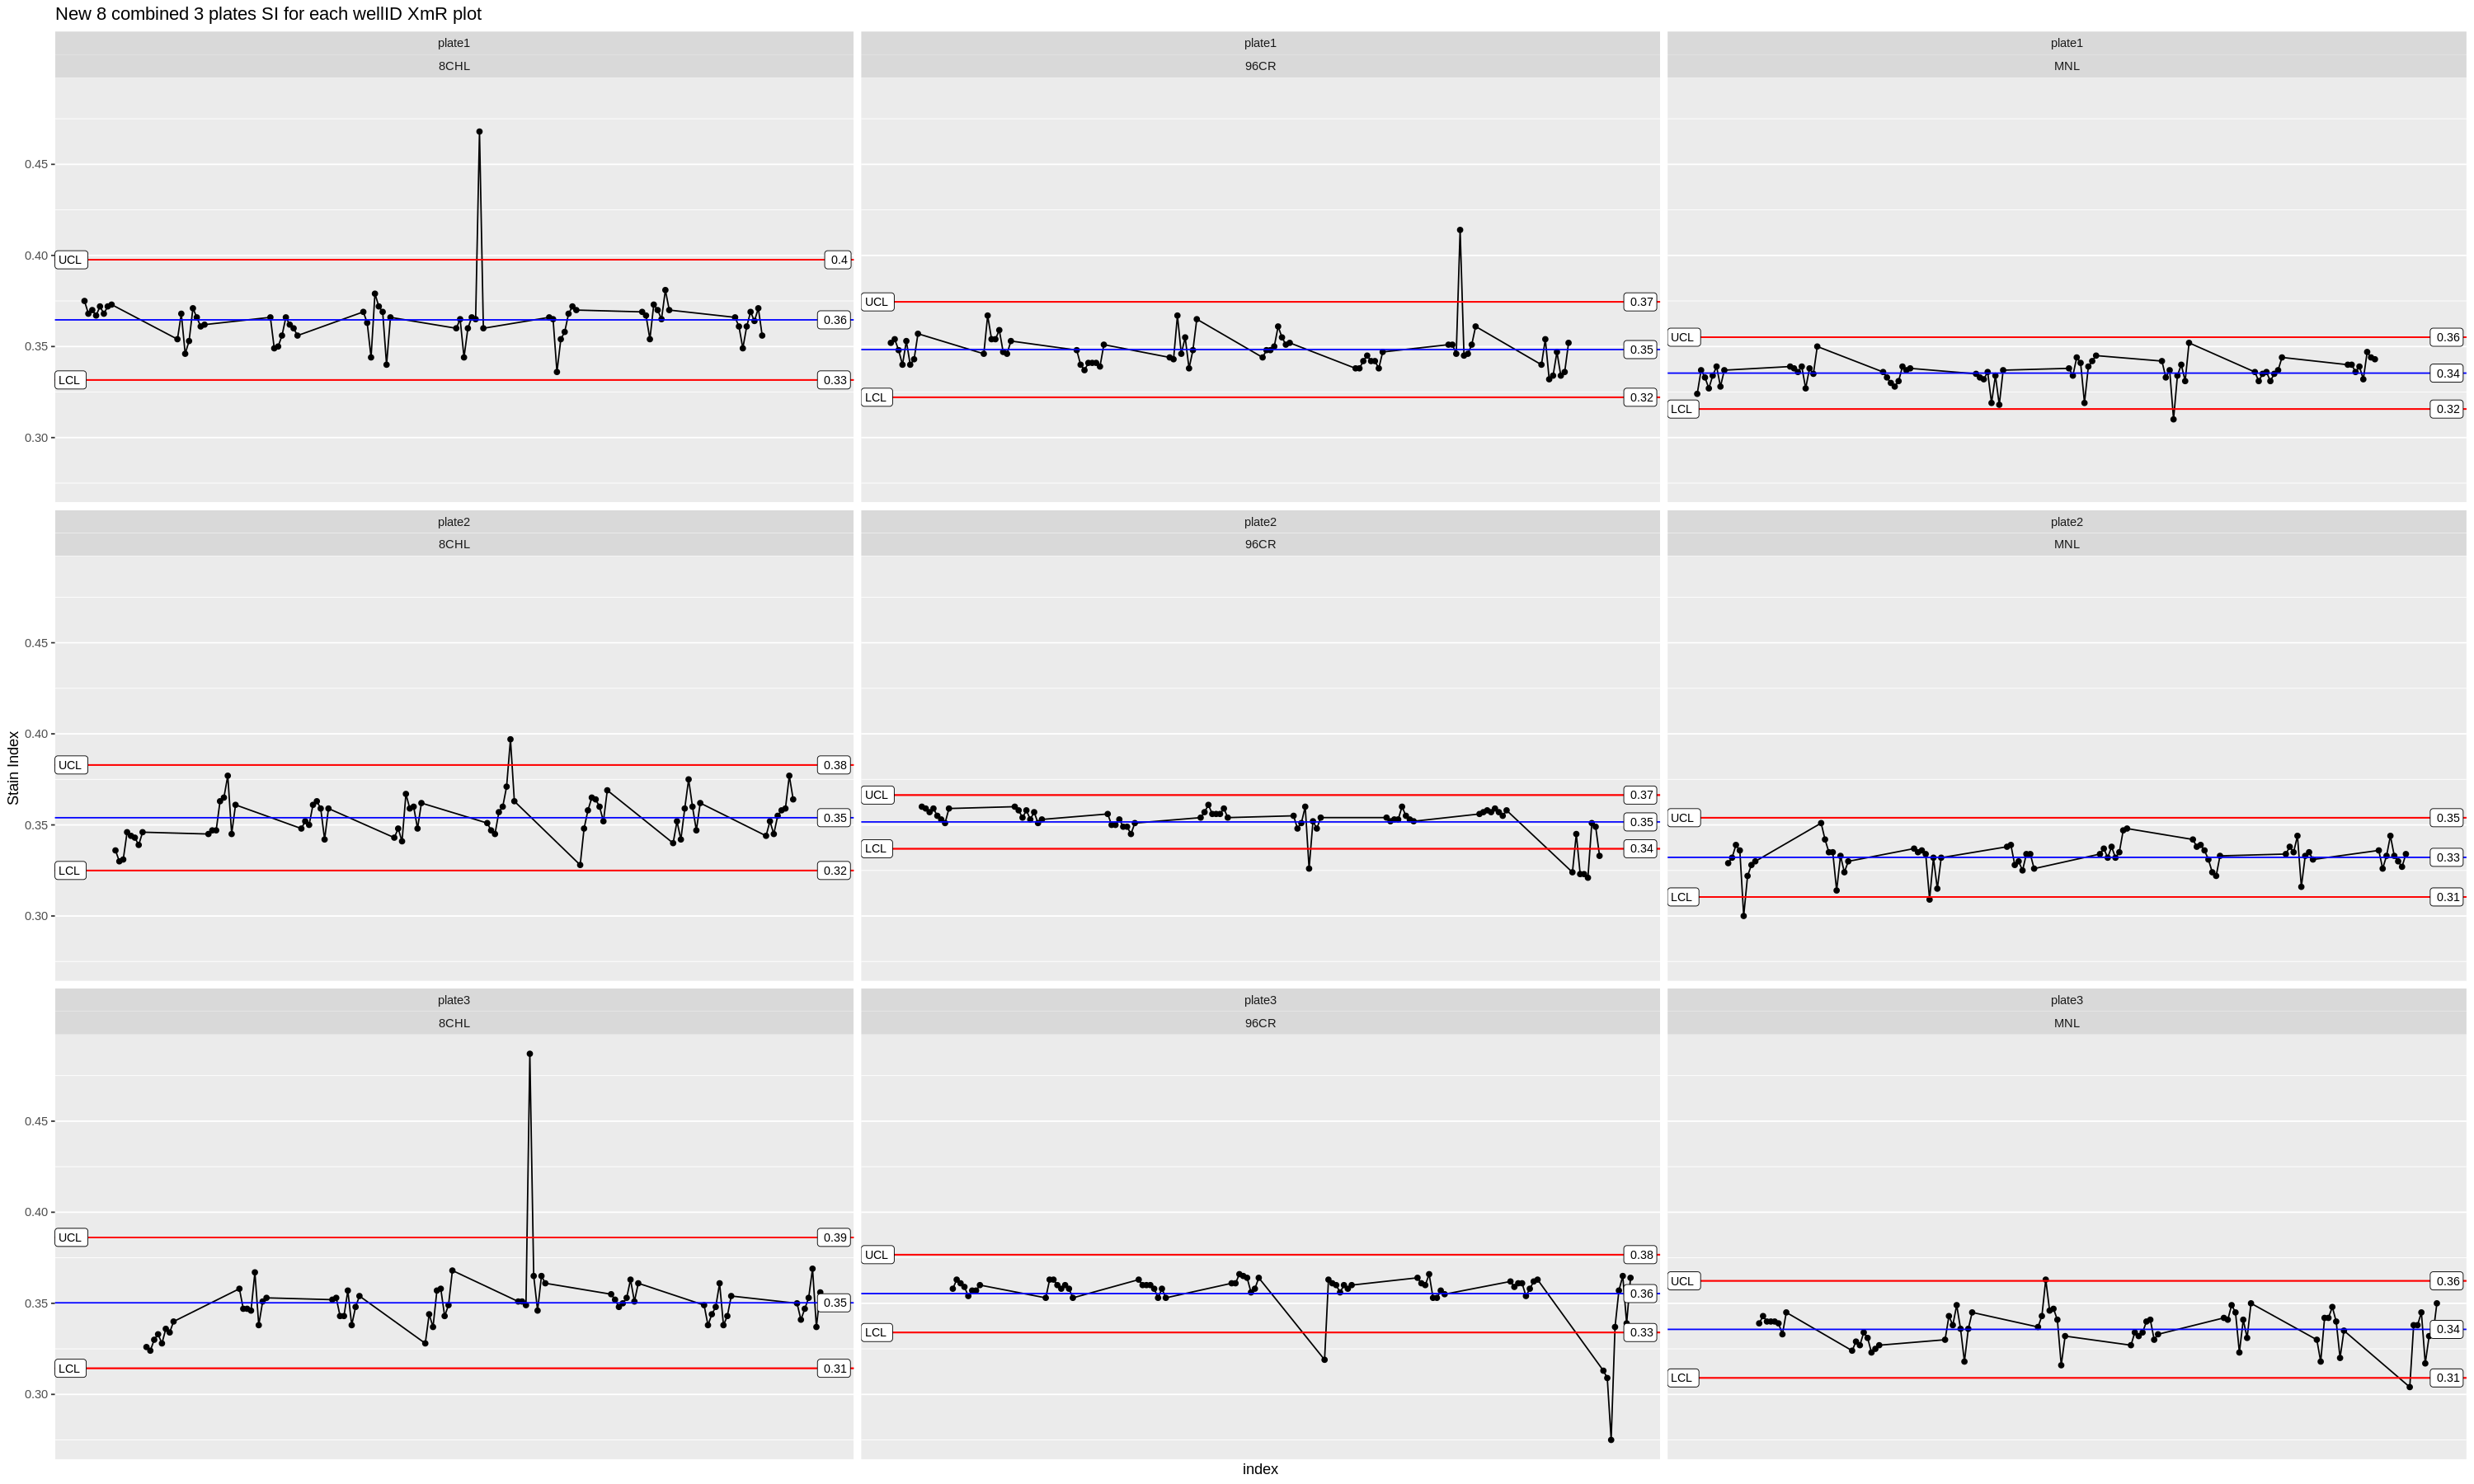

In [204]:
ggplot(dfm, aes(x=index, y=value, group = METHOD)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("Stain Index") +
  scale_x_discrete(expand =  expansion(mult = .04)) + 
  facet_wrap(PLATE~ METHOD) + 
  ggtitle("New 8 combined 3 plates SI for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 8, angle = 90))

In [9]:
wellIDs <- paste0(LETTERS[1:8], rep(seq(8), each = 72))

In [10]:
dfm <- dfm %>% mutate(wellid = wellIDs)

In [242]:
# ANOVA
res.aov <- aov(value ~ METHOD, data = dfm)
print(summary(res.aov))
print("Tukey")
print(paste0(rep("-", 25), collapse=""))
print(TukeyHSD(res.aov))
print("Pairwise")
print(paste0(rep("-", 25), collapse=""))

             Df  Sum Sq Mean Sq F value Pr(>F)    
METHOD        2 0.05114 0.02557   141.8 <2e-16 ***
Residuals   573 0.10330 0.00018                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "Tukey"
[1] "-------------------------"
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ METHOD, data = dfm)

$METHOD
                  diff          lwr          upr     p adj
96CR-8CHL -0.004515625 -0.007735709 -0.001295541 0.0029949
MNL-8CHL  -0.021859375 -0.025079459 -0.018639291 0.0000000
MNL-96CR  -0.017343750 -0.020563834 -0.014123666 0.0000000

[1] "Pairwise"
[1] "-------------------------"


In [11]:
head(dfm)

,METHOD,PLATE,COL,value,index,wellid
,<chr>,<chr>,<fct>,<dbl>,<int>,<chr>
1,8CHL,plate1,X1,0.375,1,A1
2,8CHL,plate1,X1,0.368,2,B1
3,8CHL,plate1,X1,0.370,3,C1
4,8CHL,plate1,X1,0.367,4,D1
5,8CHL,plate1,X1,0.372,5,E1
6,8CHL,plate1,X1,0.368,6,F1


In [12]:
letters <- LETTERS[1:8]
plate_cols <- seq(12)

In [23]:
# Change plot size 
options(repr.plot.width=25, repr.plot.height=15)

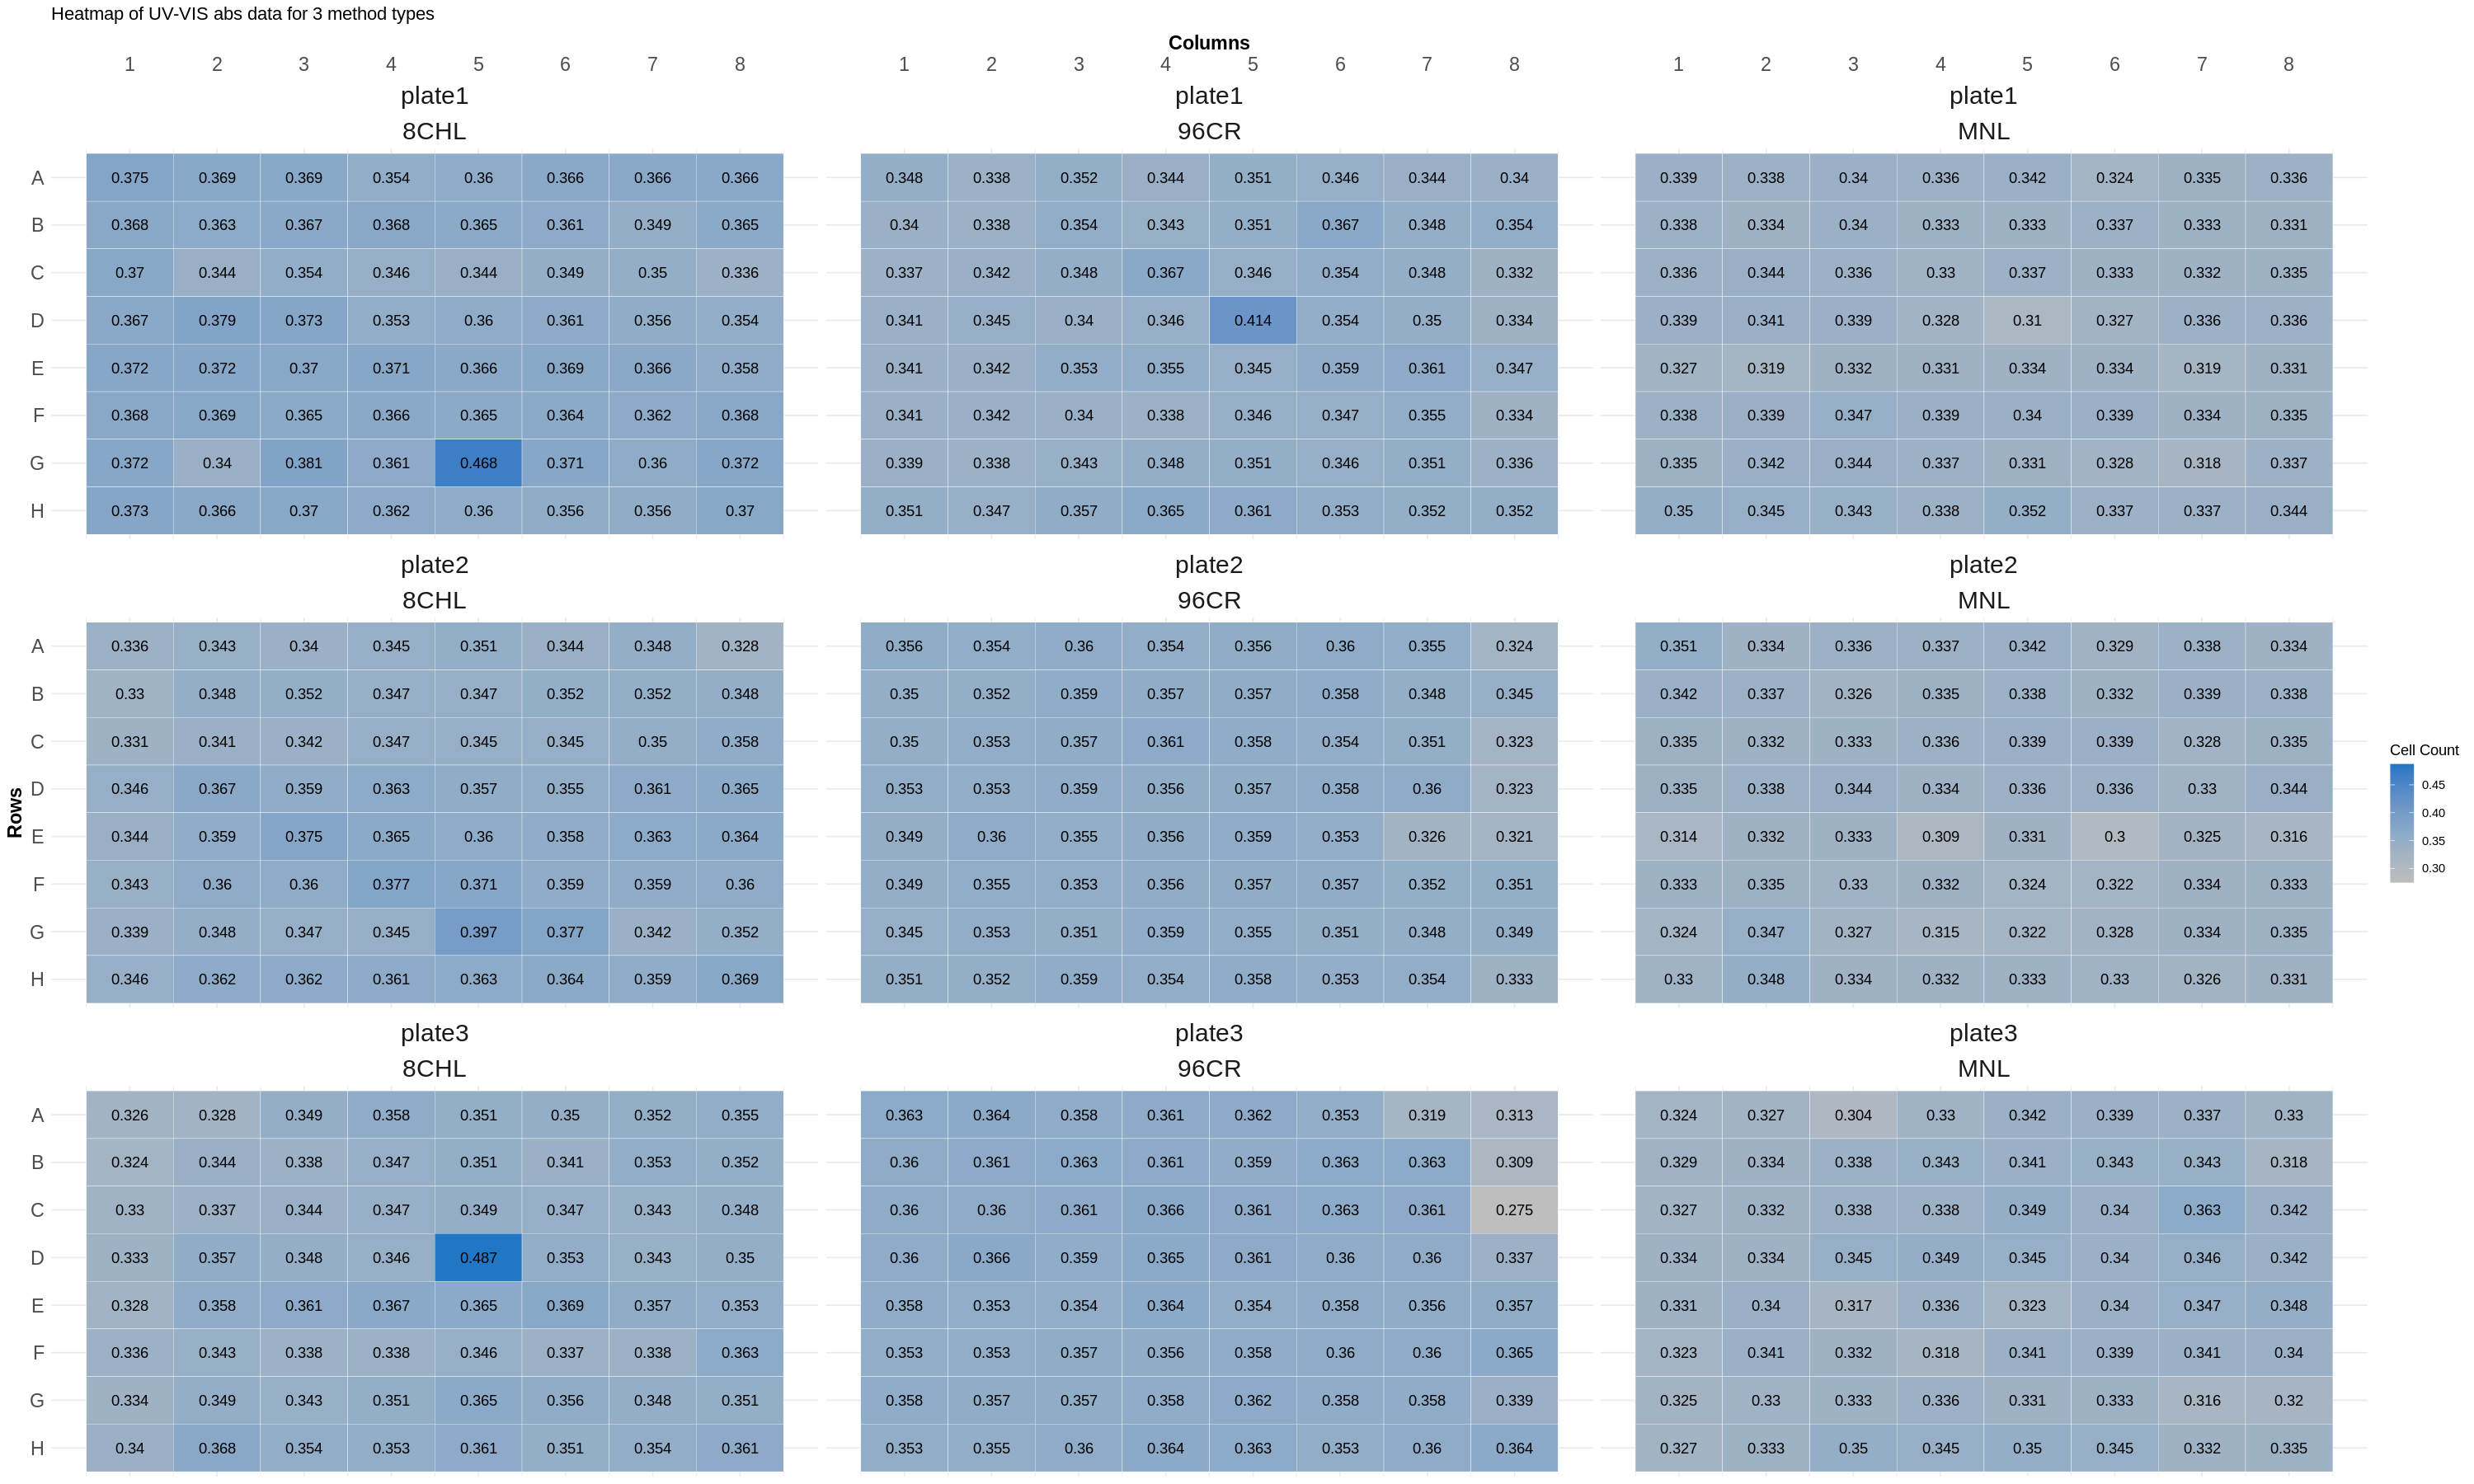

In [26]:
ggplot(dfm, aes(x = as.numeric(substr(COL,2,2)), y = ordered(substr(wellid,1,1), levels=rev(letters)), fill=value)) +
  geom_tile(color = "white") +
  scale_x_continuous(breaks=plate_cols, position = "top") +
  geom_text(aes(label = round(value,3))) +
  scale_colour_manual(values=c("white"="white", "black"="black"), guide = FALSE) +
  scale_fill_gradientn(
    name = "Cell Count", # changes legend title
    colours = c("gray","#8EACC8","#2077C5"), values = c(0.,0.4,1)
  ) +
  theme_minimal() +
  ggtitle("Heatmap of UV-VIS abs data for 3 method types") + # for the main title
  xlab("Columns") + 
  ylab("Rows") +
  facet_wrap(PLATE~METHOD) +
  theme( axis.text = element_text( size = 14 ),
           axis.title = element_text( size = 14, face = "bold" ),
           strip.text = element_text(size = 18))